# Análise Exploratória - Comércio Eletrônico

![e-commerce](imagens/thuong-mai-dien-tu.png)


### 1-Problema de Negócio

<div style="text-align: justify">
    Uma empresa internacional de comércio eletrônico (E-commerce) que vende produtos
eletrônicos deseja descobrir informações importantes de seu banco de dados de clientes.
Os produtos ficam armazenados em um armazém na sede da empresa. Após concluir a
compra no web site da empresa, o cliente recebe o produto em casa, em qualquer parte do
mundo. Os produtos são enviados de Navio, Avião ou Caminhão, dependendo da região de
entrega.
Em cada compra o cliente pode receber um desconto dependendo do peso do produto
comprado. Cada cliente pode fazer chamadas ao suporte da empresa no caso de dúvidas ou
problemas e após receber o produto o cliente pode deixar uma avaliação sobre a experiência de
compra. O único dado pessoal sobre o cliente que está disponível é o gênero. Neste projeto o objetivo é explorar os dados, compreender como estão organizados, detectar eventuais problemas e analisar os dados por diferentes perspectivas.
</div>


### 1.1-Dicionário de Dados
- **corredor_armazem**:  Character(1); Letra do corredor do armazém onde o produto está armazenado.
- **modo_envio**: String :  Modo de envio do produto.
- **numero_chamadas_cliente**: Int; Número de vezes que o cliente acionou o suporte da empresa.
- **avaliacao_cliente**: Int; Avaliação do cliente sobre a experiência de compra.
- **custo_produto**: Int; Custo do produto.
- **compras_anteriores**: Int; Número de vezes que o cliente fez uma compra na empresa.
- **prioridade_produto**: String; Prioridade de entrega do produto.
- **genero:**Character(1) Gênero do cliente (F ou M).
- **desconto**: Int; Desconto concedido na compra do produto.
- **peso_gramas**: Int; Peso do produto.
- **entregue_no_prazo**: Character(1); Se o produto foi entregue no prazo, sendo 0 (não foi entregue no prazo) ou 1 (foi entregue no prazo)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


### 2- Análise Exploratória 

In [2]:
#Bibliotecas utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # ignorando avisos de pacote

In [3]:
# Parâmetros globais de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Francisco Andreson de Lima Pinheiro" --iversions

Author: Francisco Andreson de Lima Pinheiro

numpy     : 1.24.3
pandas    : 1.4.2
matplotlib: 3.5.2
seaborn   : 0.13.2



In [5]:
#Carregando o dataset
df = pd.read_csv("dados/dataset.csv")

In [6]:
# dimensões do dataframe
df.shape

(11000, 12)

In [7]:
# Resumo do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
# Visualizar as cinco primeiras linhas
df.head(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [9]:
# Viasualizando cinco linhas aleatórias

df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
2885,2886,F,Aviao,4,1,253,3,baixa,M,36,2591,1
6800,6801,A,Navio,3,2,158,7,media,M,10,4244,1
4573,4574,F,Navio,4,4,185,3,media,M,9,4469,0
8424,8425,D,Navio,3,3,160,4,media,F,7,5147,0
5887,5888,F,Aviao,3,2,227,2,media,M,10,4290,0


In [10]:
# visualizando as cinco últimas linhas
df.tail(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
10995,10996,B,Navio,4,1,232,5,media,F,6,1247,0
10996,10997,C,Navio,5,4,242,5,baixa,F,4,1155,0
10997,10998,F,Navio,5,2,223,6,media,M,2,1210,0
10998,10999,D,Navio,2,5,155,5,baixa,F,6,1639,0
10999,11000,C,Navio,4,2,255,5,baixa,F,6,1739,0


>

-----------------------------------------------------------------------------------------------------------------

In [11]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [12]:
# Visualizando as variáveis numéricas e categóricas
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

In [13]:
# Visualizando somente as variáveis do tipo object
cats = df.dtypes[df.dtypes == "object"]
cats

corredor_armazem      object
modo_envio            object
prioridade_produto    object
genero                object
dtype: object

In [14]:
# Visualisando somente as variáveis numéricas
nums = df.dtypes[df.dtypes == "int64"]
nums

ID                         int64
numero_chamadas_cliente    int64
avaliacao_cliente          int64
custo_produto              int64
compras_anteriores         int64
desconto                   int64
peso_gramas                int64
entregue_no_prazo          int64
dtype: object

In [15]:
# Lista de colunas categóricas
cats_list = cats.index.tolist()

cats_list

['corredor_armazem', 'modo_envio', 'prioridade_produto', 'genero']

In [16]:
# Lista de colunas numéricas. 
# Aqui a variável ID não foi colocada na lista, pois não representa nenhuma informação útil.

nums_list = nums.index.tolist()[1:]
nums_list

['numero_chamadas_cliente',
 'avaliacao_cliente',
 'custo_produto',
 'compras_anteriores',
 'desconto',
 'peso_gramas',
 'entregue_no_prazo']

In [17]:
# A variável "entregue_no_prazo" , apesar de ter sido classificada como numérica pelo pandas , na verdade é uma variável 
# categórica representada por números que indicam se o produto foi entregue no prazo ou não.
df['entregue_no_prazo'].value_counts()

1    6563
0    4437
Name: entregue_no_prazo, dtype: int64

In [18]:
# foi decidido que a variável target será tratada separadamente em virtude de sua importância para o problema de negócio.
target = ['entregue_no_prazo']

-----------------------------------------------------------------------------------------------------------------

**Explorando as Variáveis Numéricas**

In [19]:
# Resumo das variáveis numéricas
df[nums_list].describe()


,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455,0.596636
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722,0.490595
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


**Análise das Variáveis Numéricas**

<div style="text-align: justify">
    <div style="text-align: justify">
        1. As colunas "numero_chamadas_cliente", "valiacao_cliente'e ''custo_produto" parecem ter uma distribuição bastante simétrica (média e mediana não são muito diferentes).</div>
    <div style="text-align: justify">
        2. As colunas 'compras_anteriores" e "desconto' parecem estar inclinadas para a direita (Média maior do que a Mediana).</div>
    <div style="text-align: justify">
        3. A coluna `peso_gramas` parece estar mais inclinada para a esquerda (Média menor do que a Mediana).
4. O count possui o mesmo valor. Isso indica que não possuimos valores ausentes.</div>
</div>


**Distribuição da Variável Numérica "custo_produto"**

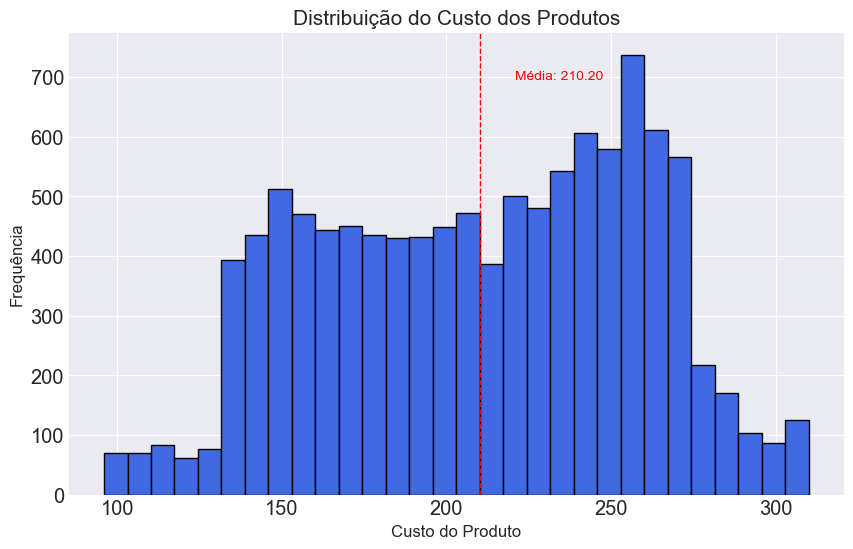

In [20]:
plt.style.use('seaborn-darkgrid')  # Usando o estilo seaborn-darkgrid para o fundo

# Criando o histograma com customizações
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.hist(df['custo_produto'], bins=30, color='royalblue', edgecolor='black')  # Histograma customizado

# Adicionando títulos e rótulos
plt.title('Distribuição do Custo dos Produtos', fontsize=15)  # Título
plt.xlabel('Custo do Produto', fontsize=12)  # Rótulo do eixo X
plt.ylabel('Frequência', fontsize=12)  # Rótulo do eixo Y

# Opcional: Adicionando uma linha vertical para a média
media_custo = df['custo_produto'].mean()
plt.axvline(media_custo, color='red', linestyle='dashed', linewidth=1)
plt.text(media_custo*1.05, plt.ylim()[1]*0.9, f'Média: {media_custo:.2f}', color='red')# Adiciona texto indicando a média

# Para salvar o gráfico no diretório atual
plt.savefig('histograma_custo_produto_customizado.png')

# Mostrar o gráfico
plt.show()


<div style="text-align:justify">

<strong>Análise da Distribuição de Custos dos Produtos:</strong>
    <div style="text-align:justify">
        <strong>1. Distribuição:</strong> A distribuição dos custos dos produtos parece ser bimodal, indicando dois picos principais onde a frequência de custos é maior. Isso pode sugerir a presença de dois grupos distintos de produtos em termos de custo no conjunto de dados.
    </div>
    <div style="text-align:justify">
        <strong>2. Intervalo de Custos:</strong> Os custos dos produtos variam de um pouco menos de 100 até aproximadamente 300 unidades monetárias. Isso sugere uma ampla gama de preços de produtos no catálogo do e-commerce.
    </div>
    <div style="text-align:justify">
        <strong>3. Picos de Frequência:</strong> Existem dois picos principais de frequência: um próximo a 150 e outro pouco acima de 250. Isso indica que uma quantidade significativa de produtos tem custos em torno desses dois valores.
    </div>
    <div style="text-align:justify">
        <strong>4. Custo Médio:</strong> A linha vertical tracejada em vermelho representa a média de custo dos produtos, que está indicada como 210.20 unidades monetárias. Esta média está mais próxima do segundo pico, indicando que os custos mais elevados dos produtos têm uma influência substancial na média de custo.
    </div>
    <div style="text-align:justify">
        <strong>5. Assimetria:</strong> O histograma mostra uma leve assimetria à direita (cauda longa à direita), o que significa que há um número menor de produtos com custos mais elevados, estendendo-se para a direita do gráfico. Isso é típico de dados de custo ou preço, onde a maioria dos itens pode ter um custo relativamente baixo, com poucos itens tendo um custo muito alto.
    </div>
    <div style="text-align:justify">
        <strong>6. Implicações Comerciais:</strong> Para um gerente de e-commerce, esta distribuição pode indicar a necessidade de segmentar estratégias de marketing ou ajustar a estratégia de precificação, considerando que existem dois grupos distintos de preços.
    </div>      
    <div style="text-align:justify">
        <strong>7. Análise Adicional:</strong> Seria interessante investigar as características dos produtos que compõem os dois picos de frequência para entender por que eles são mais comuns. Pode haver fatores como sazonalidade, tipo de produto ou estratégias de precificação influenciando essa distribuição.
    </div>
</div>


**Distribuição da Variável Numérica "compras_anteriores"**

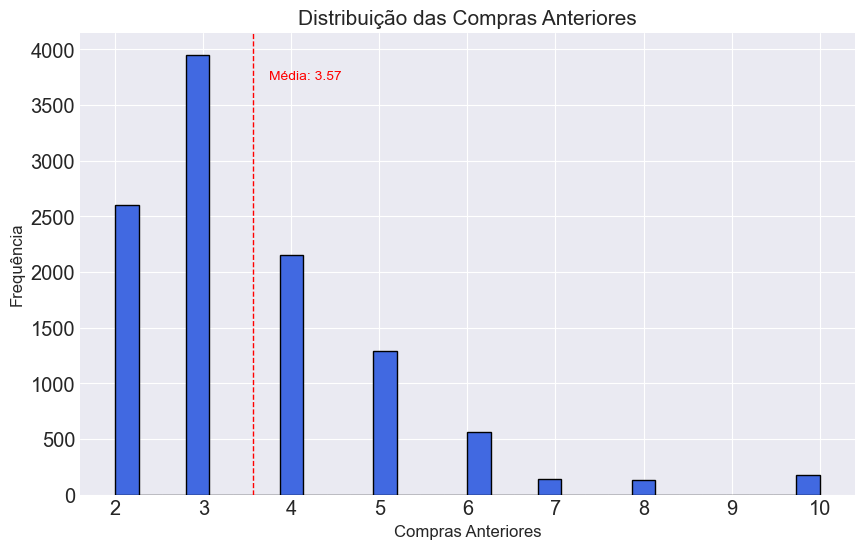

In [21]:
plt.style.use('seaborn-darkgrid')  # Usando o estilo seaborn-darkgrid para o fundo

# Criando o histograma com customizações
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.hist(df['compras_anteriores'], bins=30, color='royalblue', edgecolor='black')  # Histograma customizado

# Adicionando títulos e rótulos
plt.title('Distribuição das Compras Anteriores', fontsize=15)  # Título
plt.xlabel('Compras Anteriores', fontsize=12)  # Rótulo do eixo X
plt.ylabel('Frequência', fontsize=12)  # Rótulo do eixo Y

# linha vertical para a média
media_custo = df['compras_anteriores'].mean()
plt.axvline(media_custo, color='red', linestyle='dashed', linewidth=1)
plt.text(media_custo*1.05, plt.ylim()[1]*0.9, f'Média: {media_custo:.2f}', color='red')# Adiciona texto indicando a média

# Para salvar o gráfico no diretório atual
plt.savefig('histograma_compras_anteriores.png')

# Mostrar o gráfico
plt.show()

<div style="text-align:justify">

<strong>Análise da Distribuição de Compras Anteriores:</strong>
<div style="text-align:justify">
    <strong>1. Distribuição das Compras:</strong> O histograma mostra que a maioria dos clientes fez entre 2 e 5 compras anteriores, com a contagem diminuindo para números de compras mais altos.
</div>
<div style="text-align:justify">
    <strong>2. Pico de Frequência:</strong> Há um pico proeminente em 3 compras anteriores, o que indica que a maior frequência de clientes fez exatamente 3 compras. Isso sugere um possível ponto de retenção ou uma estratégia promocional eficaz que incentiva os clientes a fazer pelo menos 3 compras.
</div>
<div style="text-align:justify">
    <strong>3. Média de Compras:</strong> A média de compras anteriores é de aproximadamente 3.57, como indicado pela linha vermelha tracejada. Essa média está mais próxima do pico de frequência, o que é consistente com o fato de a maioria dos clientes ter um número de compras em torno desse intervalo.
</div>
<div style="text-align:justify">
    <strong>4. Clientes Recorrentes:</strong> A presença de clientes com 10 compras anteriores, embora em menor número, é um indicativo de um segmento de clientes altamente leais ou recorrentes.
</div>
<div style="text-align:justify">
    <strong>5. Diminuição após o Pico:</strong> Após o pico em 3 compras, a frequência de clientes com um maior número de compras anteriores diminui rapidamente. Isso poderia ser uma área de interesse para o e-commerce, buscando maneiras de incentivar uma maior recorrência de compras.
</div>
<div style="text-align:justify">
    <strong>6. Estratégia de Engajamento:</strong> Estratégias de engajamento e retenção de clientes podem ser necessárias para encorajar compradores com 2 a 4 compras anteriores a continuar comprando, movendo-os em direção ao segmento de 5 compras ou mais.
</div>
<div style="text-align:justify">
    <strong>7. Clientes Novos versus Recorrentes:</strong> O histograma não mostra dados para clientes com apenas 1 compra anterior ou para novos clientes. Isso pode ser uma decisão intencional para a análise ou um ponto a ser investigado, pois entender o comportamento dos clientes após a primeira compra é fundamental para estratégias de retenção.
</div>
<div style="text-align:justify">
    <strong>8. Possíveis Ações:</strong> Pode ser benéfico investigar as diferenças nas experiências ou no comportamento de compra entre os clientes com 2-3 compras e aqueles com mais de 5, para entender o que motiva a lealdade e repetição de compras.
</div>

</div>


**Distribuição da variável numérica "desconto"**

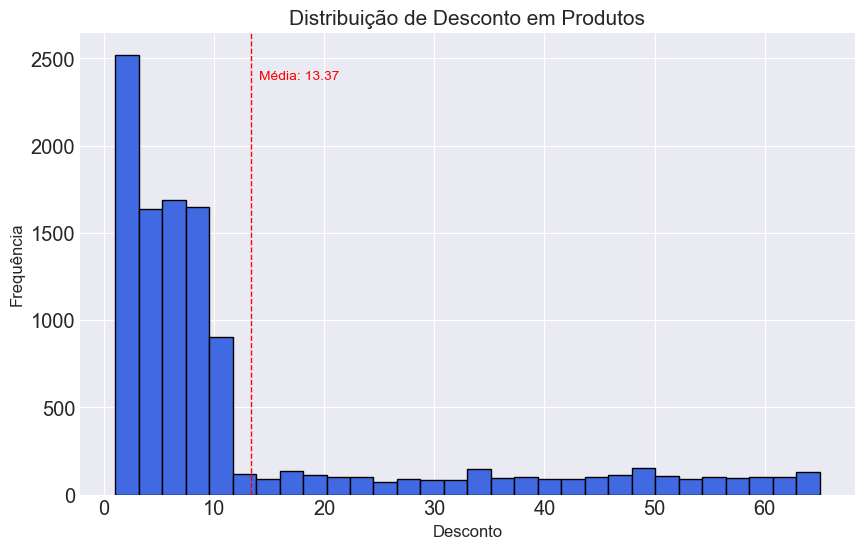

In [22]:
plt.style.use('seaborn-darkgrid')  # Usando o estilo seaborn-darkgrid para o fundo

# Criando o histograma com customizações
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.hist(df["desconto"], bins=30, color='royalblue', edgecolor='black')  # Histograma customizado

# Adicionando títulos e rótulos
plt.title('Distribuição de Desconto em Produtos', fontsize=15)  # Título
plt.xlabel("Desconto", fontsize=12)  # Rótulo do eixo X
plt.ylabel('Frequência', fontsize=12)  # Rótulo do eixo Y

# Opcional: Adicionando uma linha vertical para a média
media_custo = df["desconto"].mean()
plt.axvline(media_custo, color='red', linestyle='dashed', linewidth=1)
plt.text(media_custo*1.05, plt.ylim()[1]*0.9, f'Média: {media_custo:.2f}', color='red')# Adiciona texto indicando a média

# Para salvar o gráfico no diretório atual
plt.savefig('histograma_desconto.png')

# Mostrar o gráfico
plt.show()

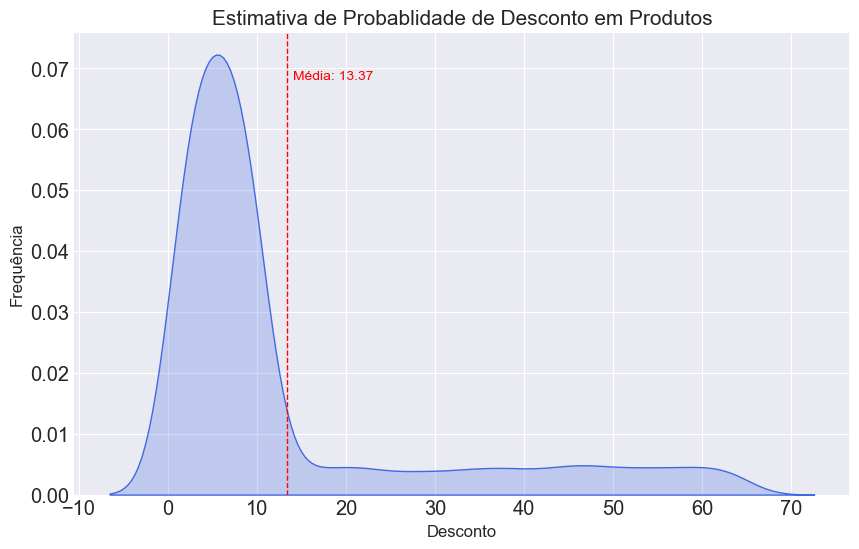

In [23]:
plt.style.use('seaborn-darkgrid')  # Usando o estilo seaborn-darkgrid para o fundo


plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.kdeplot(df["desconto"], color='royalblue', fill = True)  
# Adicionando títulos e rótulos
plt.title('Estimativa de Probablidade de Desconto em Produtos', fontsize=15)  # Título
plt.xlabel("Desconto", fontsize=12)  # Rótulo do eixo X
plt.ylabel('Frequência', fontsize=12)  # Rótulo do eixo Y

# Opcional: Adicionando uma linha vertical para a média
media_custo = df["desconto"].mean()
plt.axvline(media_custo, color='red', linestyle='dashed', linewidth=1)
plt.text(media_custo*1.05, plt.ylim()[1]*0.9, f'Média: {media_custo:.2f}', color='red')# Adiciona texto indicando a média

# Para salvar o gráfico no diretório atual
plt.savefig('kde_desconto.png')

# Mostrar o gráfico
plt.show()

<div style="text-align: justify">

<strong>Análise dos descontos em produtos:</strong>
<div style="text-align: justify">
<strong>1. Concentração de Descontos:</strong> A maioria dos descontos se concentra na faixa de 0 a 20%, com a frequência diminuindo conforme o percentual de desconto aumenta. Isso sugere que descontos mais baixos são muito mais comuns do que descontos altos.
</div>
<div style="text-align: justify">
<strong>2. Pico de Frequência:</strong> O maior pico de frequência ocorre na faixa de 5 a 10% de desconto. Isso indica que a maioria dos produtos tem um desconto dentro dessa faixa.
</div>
<div style="text-align: justify">
<strong>3. Média de Descontos:</strong> A média dos descontos é de aproximadamente 13.37%, o que está na faixa dos valores mais comuns, mas levemente mais alto que o pico principal do histograma. Isso pode ser influenciado pela presença de alguns descontos mais altos que deslocam a média para cima.
</div>
<div style="text-align: justify">
<strong>4. Descontos Elevados:</strong> Enquanto descontos acima de 20% são menos comuns, ainda existe uma quantidade não negligenciável de produtos com descontos consideravelmente altos, indo até acima de 60%.
</div>
<div style="text-align: justify">
<strong>5. Distribuição:</strong> A distribuição dos descontos é fortemente assimétrica à direita, com a cauda se estendendo para descontos mais altos. Isso indica que a ocorrência de descontos altos é rara, mas possível.
</div>
<div style="text-align: justify">
<strong>6. Estratégia de Preço:</strong> A empresa parece utilizar uma estratégia de descontos conservadora, com a maioria dos descontos sendo modestos. Isso pode ser uma estratégia deliberada para manter uma percepção de valor ou para gerenciar margens de lucro.
</div>
<div style="text-align: justify">
<strong>7. Implicações para o Negócio:</strong> Compreender a distribuição dos descontos pode ajudar a empresa a avaliar a eficácia de suas estratégias promocionais e a influência dos descontos no comportamento de compra dos clientes.
</div>
<div style="text-align: justify">
<strong>8. Análises Adicionais:</strong> Seria interessante investigar a correlação entre o tamanho do desconto e outras variáveis, como a frequência de compra do cliente, o custo do produto, ou a categoria do produto, para entender melhor como os descontos afetam as vendas e a fidelidade do cliente.
</div>

</div>


**Distribuição da variável numérica "Peso-Grama"**

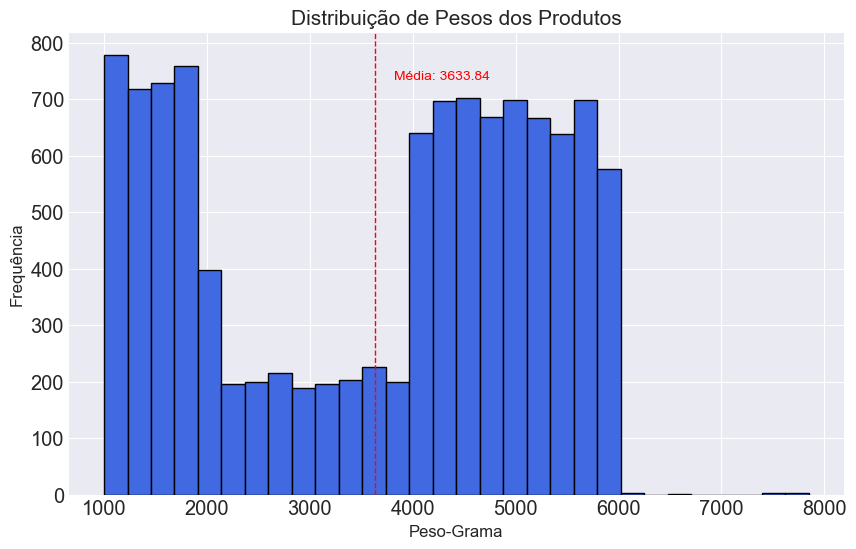

In [24]:
plt.style.use('seaborn-darkgrid')  # Usando o estilo seaborn-darkgrid para o fundo

# Criando o histograma com customizações
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.hist(df["peso_gramas"], bins=30, color='royalblue', edgecolor='black')  # Histograma customizado

# Adicionando títulos e rótulos
plt.title('Distribuição de Pesos dos Produtos', fontsize=15)  # Título
plt.xlabel("Peso-Grama", fontsize=12)  # Rótulo do eixo X
plt.ylabel('Frequência', fontsize=12)  # Rótulo do eixo Y

# Opcional: Adicionando uma linha vertical para a média
media_custo = df["peso_gramas"].mean()
plt.axvline(media_custo, color='red', linestyle='dashed', linewidth=1)
plt.text(media_custo*1.05, plt.ylim()[1]*0.9, f'Média: {media_custo:.2f}', color='red')# Adiciona texto indicando a média

# Para salvar o gráfico no diretório atual
plt.savefig('histograma_de_Pesos_dos_Produtos.png')

# Mostrar o gráfico
plt.show()

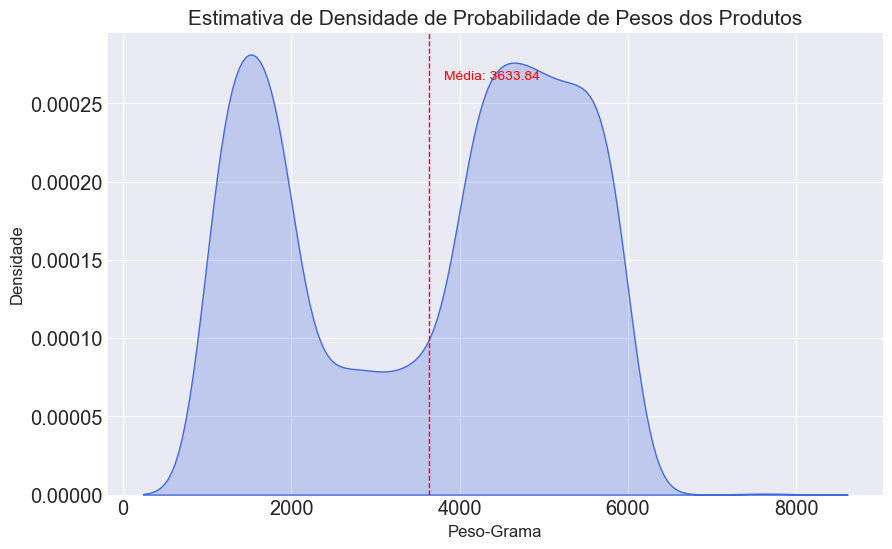

In [25]:
plt.style.use('seaborn-darkgrid')  # Usando o estilo seaborn-darkgrid para o fundo

# Criando a Estimativa de Densidade de Kernel (KDE)
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
sns.kdeplot(df["peso_gramas"], color='royalblue', fill=True)

# Adicionando títulos e rótulos
plt.title('Estimativa de Densidade de Probabilidade de Pesos dos Produtos', fontsize=15)  # Título
plt.xlabel("Peso-Grama", fontsize=12)  # Rótulo do eixo X
plt.ylabel('Densidade', fontsize=12)  # Rótulo do eixo Y

# Opcional: Adicionando uma linha vertical para a média
media_peso = df["peso_gramas"].mean()
plt.axvline(media_peso, color='red', linestyle='dashed', linewidth=1)
plt.text(media_peso*1.05, plt.ylim()[1]*0.9, f'Média: {media_peso:.2f}', color='red')  # Adiciona texto indicando a média

# Para salvar o gráfico no diretório atual
plt.savefig('estimativa_densidade_probabilidade_peso_gramas.png')

# Mostrar o gráfico
plt.show()


<div style="text-align: justify">

<strong>Análise da distribuição de Pesos dos Produtos:</strong>
<div style="text-align: justify">
    <strong>1. Distribuição:</strong> O histograma mostra uma distribuição bastante uniforme dos pesos dos produtos, com uma leve concentração em torno dos valores médios.
</div>
<div style="text-align: justify">
    <strong>2. Média de Pesos:</strong> A média dos pesos é indicada por uma linha vertical tracejada vermelha e está localizada em torno de 3633.84 gramas. Isso sugere que, em média, os produtos têm um peso moderado.
</div>
<div style="text-align: justify">
    <strong>3. Alcance dos Pesos:</strong> Os pesos variam amplamente, de menos de 1000 gramas a mais de 8000 gramas. Essa variação sugere que o e-commerce lida com uma variedade diversa de produtos, desde itens leves até itens muito pesados.
</div>
<div style="text-align: justify">
    <strong>4. Picos de Frequência:</strong> Há múltiplos picos de frequência no histograma, indicando que certos pesos de produtos são mais comuns do que outros. Não parece haver um único peso que domine em termos de frequência, o que novamente apoia a ideia de um inventário diversificado.
</div>
<div style="text-align: justify">
    <strong>5. Simetria:</strong> A distribuição parece ser relativamente simétrica em torno da média, com uma distribuição similar de pesos tanto abaixo quanto acima do valor médio.
</div>
<div style="text-align: justify">
    <strong>6. Análise de Intervalo:</strong> A distribuição é segmentada em intervalos (bins), e cada bin tem uma frequência similar, sem indicar uma grande disparidade ou irregularidade nos pesos dos produtos.
</div>
<div style="text-align: justify">
    <strong>7. Análises Adicionais:</strong> Uma análise adicional pode incluir a investigação da relação entre o peso dos produtos e outras variáveis, como o custo do produto, descontos aplicados ou taxas de frete, para determinar se o peso afeta esses outros fatores.
</div>
<div style="text-align: justify">
    <strong>8. Considerações Logísticas:</strong> Do ponto de vista logístico, a gestão do transporte pode ser desafiadora devido à grande variação nos pesos dos produtos, o que pode afetar tanto o custo de envio quanto as opções de embalagem e transporte.
</div>

</div>



**Explorando as Variáveis Categóricas**

In [26]:
# Resumo das variáveis categóricas. Utilizando variáveis categóricas.

df[cats_list].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


Algumas observações:

* Para a variável corredor_armazem **F** é a classe dominante.
* Para a variável de modo de envio **Navio** é a classe dominante.
* Para a variável de prioridade do produto **baixa** é a classe dominante.
* Para a variável de gênero, **F(Feminino)** é a classe dominante.
* Todos os valores únicos para cada categoria estão em torno de **2-5 valores únicos**
* Não trabalhe com  algo que você não consegue explicar. Se existe alguma variável despertou dúvidas e não foi possível explicar as dúvidas após pesquisa com a área de negócio, retire esta variável do dataset.
    

In [27]:
# Listando o total por categoria de cada variável categórica
for col in cats_list:
    print(f'''Total de Registros Por Categoria da Variável {col}:''')
    print(df[col].value_counts())
    print()
    


Total de Registros Por Categoria da Variável corredor_armazem:
F    3666
D    1834
C    1834
A    1833
B    1833
Name: corredor_armazem, dtype: int64

Total de Registros Por Categoria da Variável modo_envio:
Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

Total de Registros Por Categoria da Variável prioridade_produto:
baixa    5298
media    4754
alta      948
Name: prioridade_produto, dtype: int64

Total de Registros Por Categoria da Variável genero:
F    5546
M    5454
Name: genero, dtype: int64



**Análise Univariada das Variáveis Numéricas**

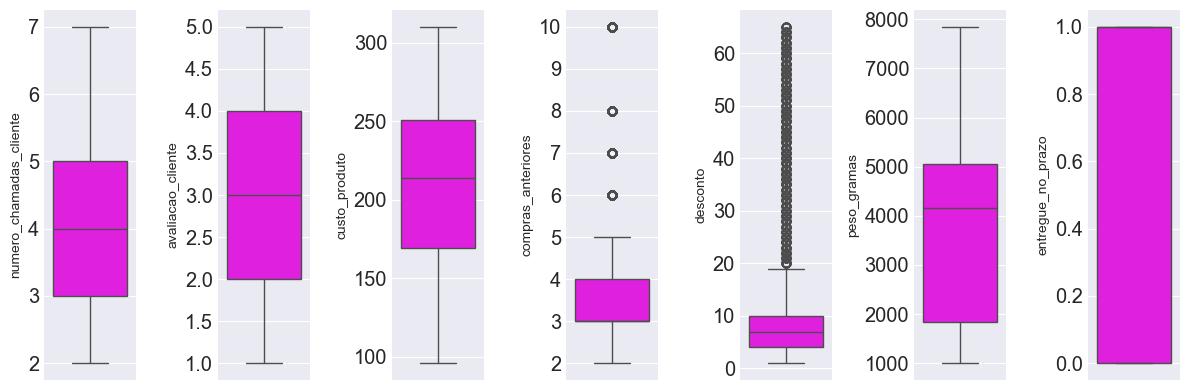

In [28]:
features = nums_list
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout() # para colocar tudo na mesma áre ade plotagem.
    plt.savefig("Boxplot_Outliers_Numéricas")

<div style="text-align: justify">

<strong>Análise das Variáveis:</strong>

<div style="text-align: justify"> 

<strong>1. Número de Chamadas do Cliente:</strong>
- A mediana está próxima do centro da caixa, indicando uma distribuição simétrica dos dados.
- Os "bigodes" estendem-se bem acima e abaixo da caixa, sugerindo uma variação relativamente grande.
- Não há pontos outliers aparentes, o que pode indicar que todas as chamadas do cliente estão dentro de um intervalo aceitável.

</div>

<strong>2. Avaliação do Cliente:</strong>
- Semelhante ao número de chamadas, a avaliação do cliente também tem uma distribuição simétrica em torno da mediana.
- A variação, no entanto, é menor em comparação com o número de chamadas do cliente, como evidenciado pelos "bigodes" mais curtos.

<strong>3. Custo do Produto:</strong>
- A mediana está um pouco acima do centro, o que poderia indicar uma leve assimetria dos dados.
- O intervalo de custo é bastante grande, como mostrado pela extensão dos "bigodes".
- Não são visíveis outliers, sugerindo que a maioria dos preços dos produtos está dentro de um intervalo comum.

<strong>4. Compras Anteriores:</strong>
- O boxplot mostra que a maioria das compras anteriores concentra-se em torno de valores mais baixos.
- Há vários outliers, indicando clientes que fizeram muitas mais compras do que a média.

<strong>5. Desconto:</strong>
- A distribuição dos descontos é bastante assimétrica, com muitos valores concentrados na extremidade inferior da escala.
- Existem muitos outliers, indicando casos em que descontos excepcionalmente altos foram aplicados.

<strong>6. Peso em Gramas:</strong>
- A distribuição de peso tem uma mediana mais próxima do topo da caixa, sugerindo uma assimetria com mais itens de peso leve.
- Os "bigodes" inferiores e superiores têm comprimentos variados, indicando possível assimetria.
- Não há outliers aparentes, o que sugere uma consistência no peso dos itens.

<strong>7. Entregue no Prazo:</strong>
- Este boxplot é interessante porque parece mostrar apenas um único valor constante ou uma variação muito pequena, o que pode ser um indicativo de que a maioria ou todos os produtos foram entregues no prazo (se o valor for 1) ou não (se o valor for 0).
- A falta de variação sugere que esta variável pode ser binária ou tem muito pouca variação nos dados.

</div>



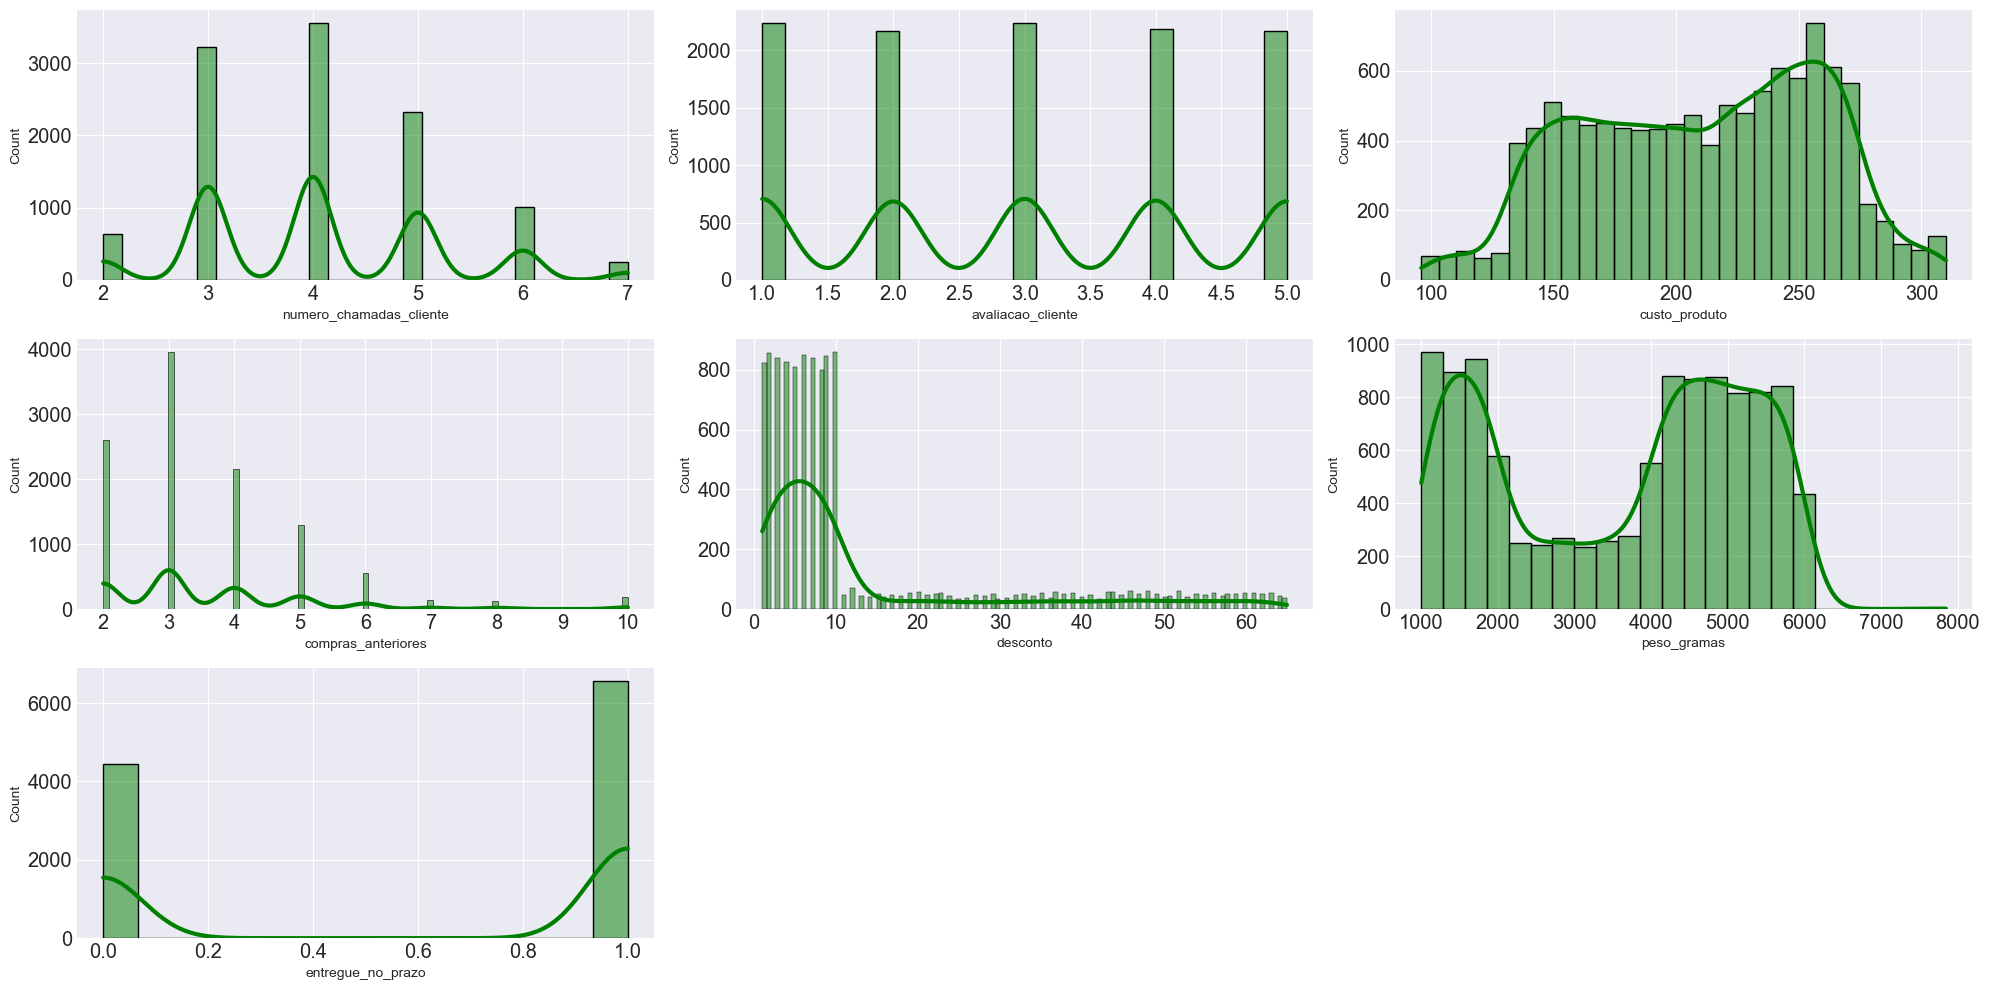

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define o tamanho da figura com base no número de colunas numéricas
plt.figure(figsize=(20, 10))

# Calcula o número de colunas, arredondando para cima para garantir espaço para todos os plots
n_cols = len(nums_list) // 3 if len(nums_list) % 3 == 0 else (len(nums_list) // 3 + 1)

# Cria um histplot para cada coluna numérica
for i in range(len(nums_list)):
    plt.subplot(3, n_cols, i+1)  # 3 linhas e o número calculado de colunas
    sns.histplot(df[nums_list[i]], kde=True, color='green')
    plt.xlabel(nums_list[i])
    plt.tight_layout()  # Ajusta o layout para evitar sobreposições

# Salva o gráfico depois de criar todos os subplots
plt.savefig("Dist_Plot_Numéricas.png")
plt.show()  # Mostra o gráfico


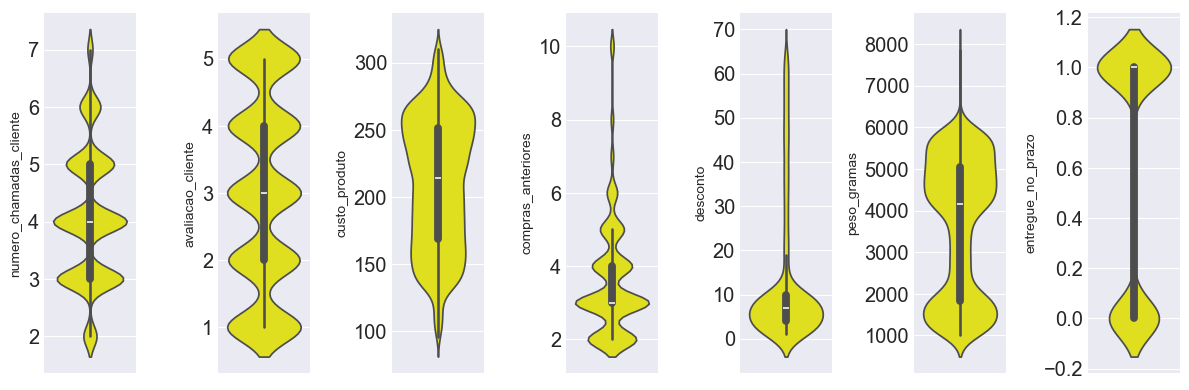

In [30]:
for i in range(0, len(nums_list)):
    plt.subplot(1, len(nums_list), i+1)
    sns.violinplot(y = df[nums_list[i]], color = 'yellow', orient = 'v')
    plt.tight_layout()
    plt.savefig("Análise Univariada_ViolinPlot")

<div style="text-align: justify">
<p style="text-align: justify"><strong>Análise Univariada das Variáveis Numéricas:</strong></p>

<p style="text-align: justify"><strong>1. Número de Chamadas do Cliente:</strong><br>
   - A distribuição é bimodal, com picos em torno dos valores 3 e 5, sugerindo que os clientes tendem a ligar ou muito pouco ou um número moderado de vezes.<br>
   - Não há muitos outliers, e a distribuição é simétrica em torno da mediana.</p>

<p style="text-align: justify"><strong>2. Avaliação do Cliente:</strong><br>
   - Esta variável também parece ter uma distribuição bimodal, indicando que existem dois grupos de avaliações frequentemente dadas pelos clientes.<br>
   - A distribuição é um pouco inclinada para avaliações mais altas.</p>

<p style="text-align: justify"><strong>3. Custo do Produto:</strong><br>
   - A distribuição do custo é bastante uniforme em todo o intervalo, mas parece haver uma leve concentração de valores em torno da mediana.<br>
   - Não há muitos valores extremos ou outliers, sugerindo que os preços dos produtos variam dentro de uma faixa limitada.</p>

<p style="text-align: justify"><strong>4. Compras Anteriores:</strong><br>
   - A variável de compras anteriores tem uma distribuição com múltiplos picos, sugerindo que existem alguns valores comuns ou típicos de compras anteriores.<br>
   - Existem outliers, representados pelos pontos acima das partes principais dos violinos, indicando clientes com um número anormalmente alto de compras anteriores.</p>

<p style="text-align: justify"><strong>5. Desconto:</strong><br>
   - A distribuição de descontos é altamente assimétrica com uma cauda longa à direita, mostrando que a maioria dos descontos é baixa, com poucos casos de descontos muito altos.<br>
   - A área mais larga do violino está perto do zero, o que pode indicar uma quantidade significativa de produtos vendidos sem desconto.</p>

<p style="text-align: justify"><strong>6. Peso em Gramas:</strong><br>
   - O peso dos produtos apresenta uma distribuição que é relativamente simétrica em torno da mediana.<br>
   - Existem alguns valores extremos, tanto na extremidade inferior quanto na superior do espectro de peso.</p>

<p style="text-align: justify"><strong>7. Entregue no Prazo:</strong><br>
   - Esta parece ser uma variável binária ou muito próxima disso, indicada pelo fato de o violino ter pontos de dados concentrados em dois valores, provavelmente 0 e 1.<br>
   - A distribuição mostra que há mais casos de uma categoria do que da outra, o que pode indicar uma taxa maior de entregas no prazo ou fora do prazo, dependendo de qual valor corresponde a qual condição.</p>
</div>


**Análise Univariada das variáveis Categóricas**

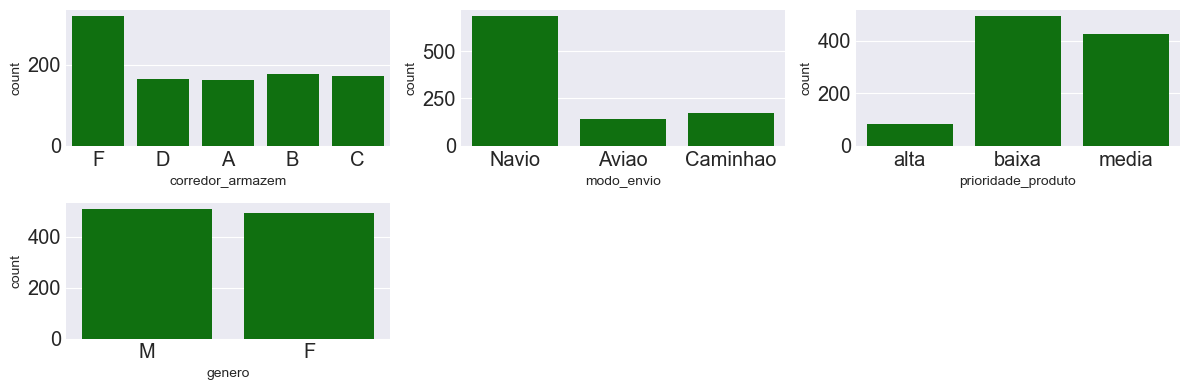

In [31]:
# Pelo fato do conjunto de dados possuir 11.0000 linhas, foi decidido fazer uma amostra dos para aumentar a velocidade de criação 
# dos gráficos.A função sample(1000).

df_sample = df.sample(1000, random_state = 42) # random state representa o processo aleatório de escolha dos dados.
for i in range(0, len(cats_list)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats_list[i]], color = 'green', orient = 'v')
    plt.tight_layout()
    plt.savefig("Análise-Univariada-Categóricas")

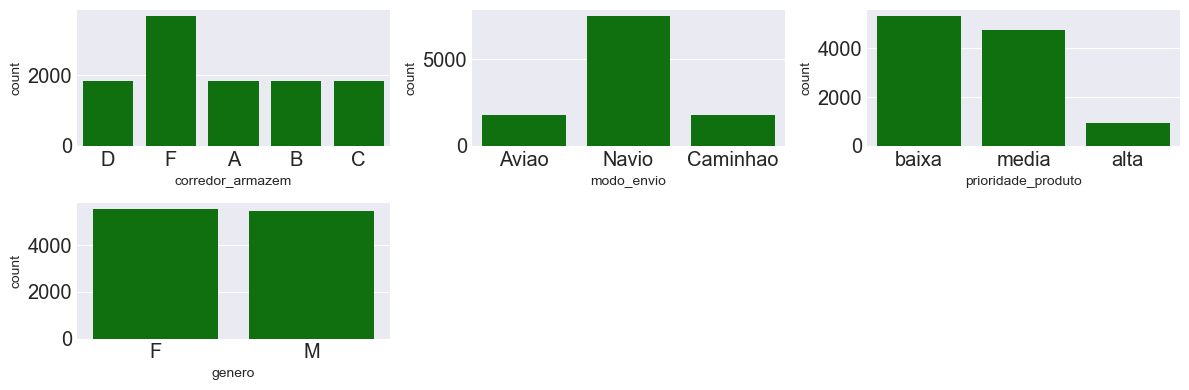

In [32]:
# Utilizando todo o conjunto de dados:
for i in range(0, len(cats_list)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df[cats_list[i]], color = 'green', orient = 'v')
    plt.tight_layout()
    plt.savefig("Análise-Univariada-Categóricas-total")

<div style="text-align: justify">
<p style="text-align: justify"><strong>1. Corredor do Armazém (`corredor_armazem`):</strong><br>
   - A variável 'corredor_armazem' tem cinco categorias, identificadas pelas letras A a F.<br>
   - O corredor F é o mais frequente para armazenar produtos, seguido pelo corredor D, enquanto o corredor C é o menos utilizado.<br>
   - Essa distribuição pode indicar preferências ou práticas de armazenamento, com certos corredores possivelmente mais acessíveis ou designados para produtos mais populares.</p>

<p style="text-align: justify"><strong>2. Modo de Envio (`modo_envio`):</strong><br>
   - Existem três modos de envio: Avião, Navio e Caminhão.<br>
   - O modo 'Navio' é o mais utilizado, o que pode ser devido a custos mais baixos ou à adequação para a maioria dos produtos enviados.<br>
   - 'Avião' é o menos utilizado, talvez devido ao custo mais alto ou a uma necessidade menor de envio rápido.</p>

<p style="text-align: justify"><strong>3. Prioridade do Produto (`prioridade_produto`):</strong><br>
   - Há três níveis de prioridade: baixa, média e alta.<br>
   - A prioridade 'média' parece ser a mais comum, seguida de perto pela 'alta', enquanto a 'baixa' é menos frequente.<br>
   - Isso pode refletir uma tendência do e-commerce em priorizar os envios ou uma característica dos próprios produtos.</p>

<p style="text-align: justify"><strong>4. Gênero (`genero`):</strong><br>
   - O gráfico apresenta a distribuição de clientes por gênero, sendo F para feminino e M para masculino.<br>
   - A distribuição entre F e M é bastante equilibrada, com uma ligeira predominância de registros masculinos.<br>
   - Essa divisão quase igual sugere que a base de clientes é diversificada em termos de gênero.</p>
</div>



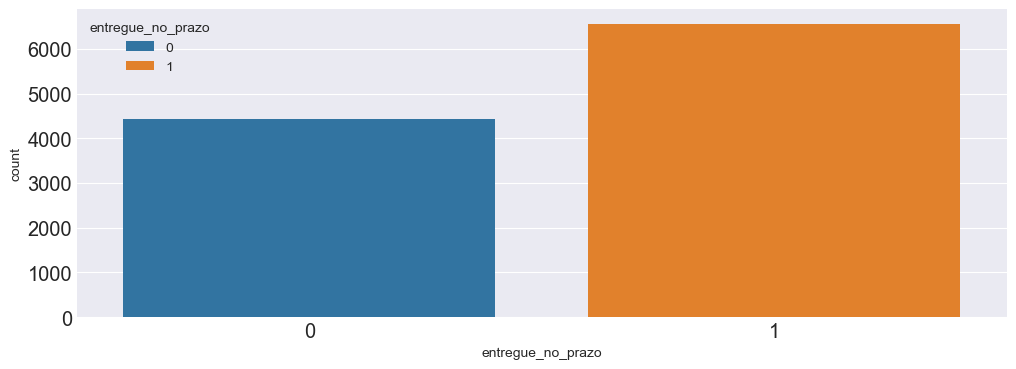

In [33]:
# Verificando a contagem da variável target ("entregue_no_prazo)"
sns.countplot(data =df, x = df["entregue_no_prazo"], hue = "entregue_no_prazo")
plt.savefig("Contagem_Variavel_Target")

<div style="text-align: justify">
<p style="text-align: justify">O gráfico de barras mostra a contagem de mercadorias baseada na variável "entregue_no_prazo", que indica se as mercadorias foram entregues dentro do prazo (1) ou fora do prazo (0).</p>

<p style="text-align: justify">A partir do gráfico, podemos observar que:</p>

<p style="text-align: justify">- A barra correspondente a '1' (cor laranja) é significativamente maior do que a barra correspondente a '0' (cor azul). Isso sugere que uma grande maioria das mercadorias foi entregue dentro do prazo.</p>

<p style="text-align: justify">- O número de mercadorias entregues dentro do prazo é visivelmente superior ao número de mercadorias entregues fora do prazo. Isso pode ser indicativo de uma operação de logística eficiente, um bom planejamento de entrega, ou que as expectativas de prazo de entrega estão bem ajustadas às capacidades de entrega.</p>

<p style="text-align: justify">- A discrepância entre as duas barras pode também apontar para a possibilidade de que a entrega no prazo seja um ponto de ênfase e uma métrica de sucesso para a empresa ou que há processos efetivos de mitigação de riscos que previnem atrasos.</p>

<p style="text-align: justify">Para uma análise mais aprofundada, seria útil examinar os fatores que contribuem para os casos em que a entrega não é feita no prazo. Poderíamos investigar se certos modos de envio, períodos do ano, tipos de produto ou regiões geográficas têm mais probabilidade de estar associados a atrasos nas entregas. Essa análise poderia fornecer insights valiosos para melhorar a eficácia das operações de entrega.</p>
</div>


**Análise Bivariada - Mapa de Correlação da Variáveis Numéricas** 


In [34]:
# Calculando a correlação das variáveis numéricas:
df[nums_list].corr()


,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas,entregue_no_prazo
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593,-0.067116
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823,0.013195
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689,-0.073682
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295,-0.055613
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992,0.397128
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000,-0.268630
entregue_no_prazo,-0.067116,0.013195,-0.073682,-0.055613,0.397128,-0.268630,1.000000


In [35]:
corr_df = df[nums_list].corr()

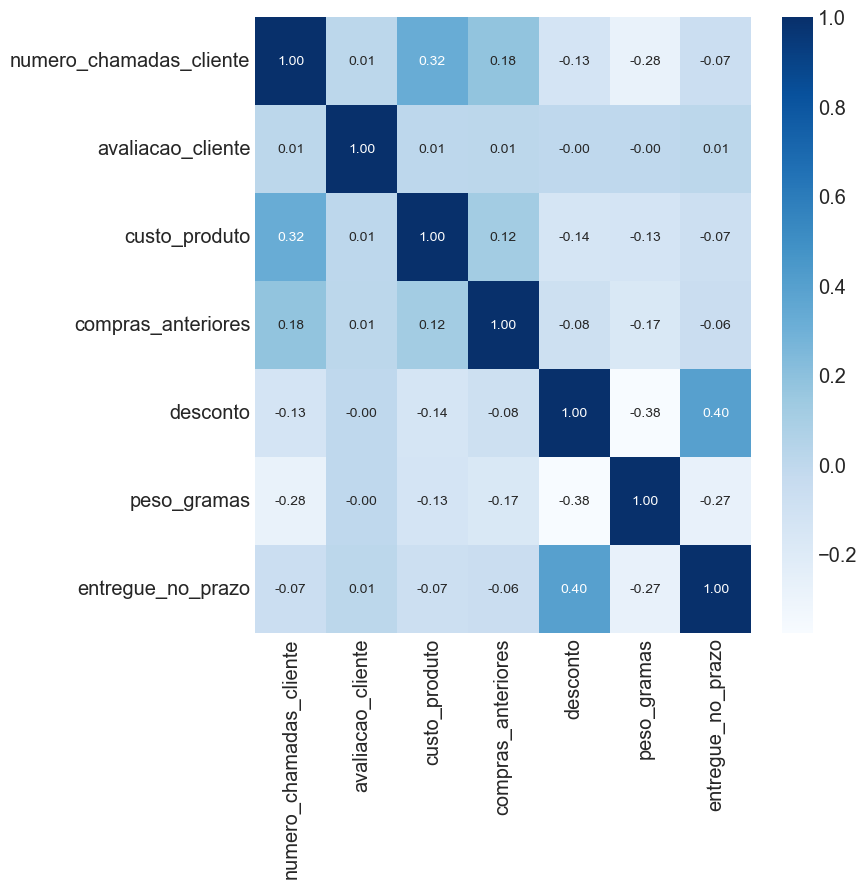

In [36]:
#Plotagem do mapa de correlação
plt.figure(figsize = (8, 8))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f')
plt.savefig("Mapa de Correlação")
# annot = annotation -> para que os valores sejam mostrados; 
# fmt = formatação - ".2f" -  duas casas decimais

<div style="text-align:justify">
    <div style="text-align:justify">
    No mapa de calor de correlação cada quadrado mostra a correlação entre duas variáveis. A escala de cores à direita indica o valor da correlação, onde 1.0 é a correlação perfeita positiva (azul escuro), 0 indica nenhuma correlação (branco) e -1 indica correlação perfeita negativa (azul claro). Vou analisar as correlações significativas apresentadas:
    </div>
    
<strong>Análise de correlação das variáveis numéricas:</strong>
    <div style="text-align:justify">
        1. <strong>Número de Chamadas do Cliente (`chamadas_cliente`) e Custo do Produto (`custo_produto`):</strong>
   Existe uma correlação moderadamente positiva de 0.32. Isso pode indicar que clientes que fazem mais chamadas tendem a comprar produtos mais caros, ou que produtos mais caros podem gerar mais chamadas de clientes, possivelmente devido a questões ou preocupações de serviço.
    </div>
    <div style="text-align:justify">
2. <strong>Número de Chamadas do Cliente (`chamadas_cliente`) e Peso em Gramas (`peso_gramas`):</strong>
   A correlação é negativa (-0.28), o que pode sugerir que produtos mais pesados tendem a ter menos chamadas de cliente, ou que chamadas mais frequentes podem estar associadas a produtos mais leves.
      </div>
      <div style="text-align:justify">
3. <strong>Desconto e Peso em Gramas (`peso_gramas`):</strong>
   A correlação é significativamente negativa (-0.38), sugerindo que produtos mais pesados podem ter menos descontos aplicados.
     </div>
     <div style="text-align:justify">
4. <strong>Desconto e Entrega no Prazo (`entregue_no_prazo`):</strong>
   Há uma correlação positiva de 0.40, o que é notável. Pode-se inferir que descontos maiores estão de alguma forma associados a uma maior probabilidade de entrega no prazo, ou vice-versa.
     </div>
     <div style="text-align:justify">
5. <strong>Peso em Gramas (`peso_gramas`) e Entrega no Prazo (`entregue_no_prazo`):</strong>
   A correlação é negativa (-0.27), indicando que produtos mais pesados podem ter uma probabilidade ligeiramente menor de serem entregues no prazo.
     </div>
     <div style="text-align:justify">
As outras correlações apresentadas no mapa de calor são bastante baixas (próximas de 0), o que sugere uma relação linear fraca ou inexistente entre essas variáveis. <strong>É importante notar que a correlação não implica causalidade.</strong> Para entender melhor as relações entre essas variáveis, seria necessário realizar uma análise mais aprofundada, possivelmente incluindo modelos estatísticos que podem controlar outras variáveis e tentar estabelecer relações causais.
    </div>
</div>


**Análise Bivariada com Pair Plot das variáveis numéricas**

<Figure size 1500x1500 with 0 Axes>

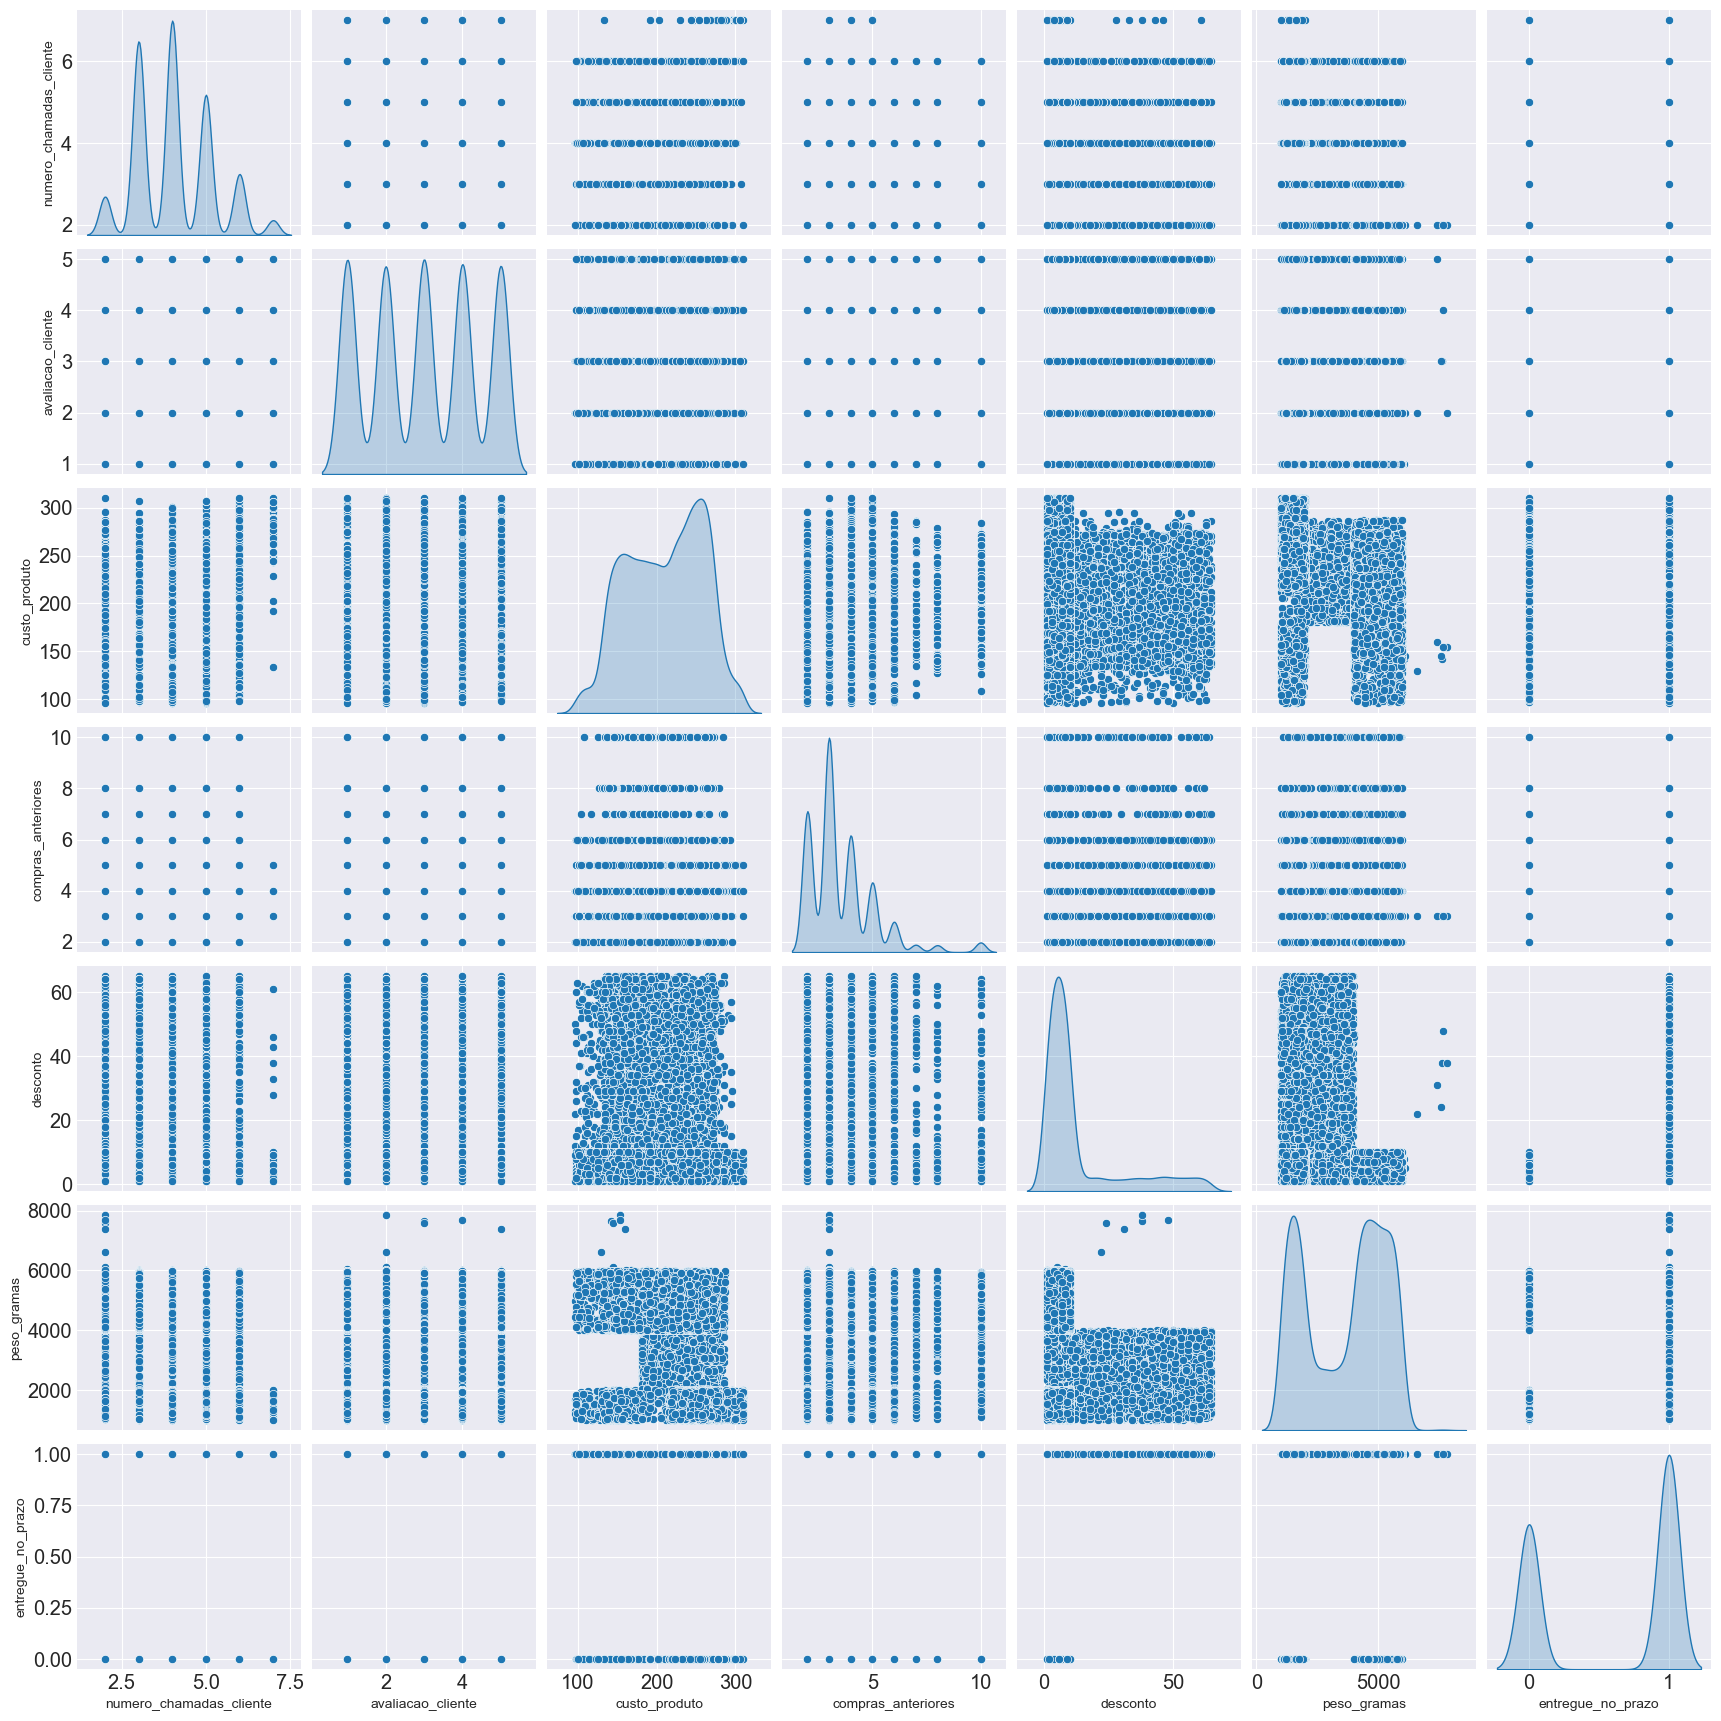

In [37]:
plt.figure(figsize = (15, 15))
sns.pairplot(df[nums_list], diag_kind = 'kde')
plt.savefig('Mapa de Correlação 2')

<div style="text-align: justify">
    <div style="text-align: justify">
        Em um pairplot, a diagonal principal mostra a distribuição de densidade de <strong>cada variável</strong> individual, enquanto os gráficos fora da diagonal mostram a relação linear para <strong>pares de variáveis</strong>. No gráfico, a diagonal está configurada para mostrar estimativas de densidade do kernel (KDE - Kernel Density Estimate) ao invés de histogramas.
    </div>
    Com base na descrição do gráfico:
    <div style="text-align: justify">
        1. <strong>Distribuições (Diagonal):</strong>
        - As variáveis como `numero_chamadas_cliente`, `custo_produto`, e `peso_gramas` parecem ter distribuições contínuas com vários picos, o que pode indicar múltiplos grupos ou faixas comuns de valores dentro dessas variáveis.
        - A variável `entregue_no_prazo` tem uma distribuição que sugere que é uma variável binária, mostrando picos para dois valores específicos (provavelmente 0 e 1), que representam 'não entregue no prazo' e 'entregue no prazo', respectivamente.
    </div>
    <div style="text-align: justify">
        2. <strong>Relações (Fora da Diagonal):</strong>
        - Os scatter plots mostram a relação entre duas variáveis em cada interseção fora da diagonal principal. Pela descrição do gráfico, parece que não há padrões lineares fortes ou correlações claras entre as variáveis, pois muitos dos plots parecem ter pontos dispersos sem uma direção clara.
        - Além disso, a presença de linhas verticais ou horizontais nos scatter plots indica variáveis com um número limitado de valores distintos ou variáveis binárias, como é provavelmente o caso de `entregue_no_prazo`.
    </div>
    <div style="text-align: justify">
        3. <strong>Outliers:</strong>
        - Alguns dos scatter plots e gráficos KDE podem mostrar a presença de outliers - pontos que se distanciam do agrupamento principal de dados.
    </div>
</div>

     

**Relação das variáveis categóricas e variável Target**

In [38]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

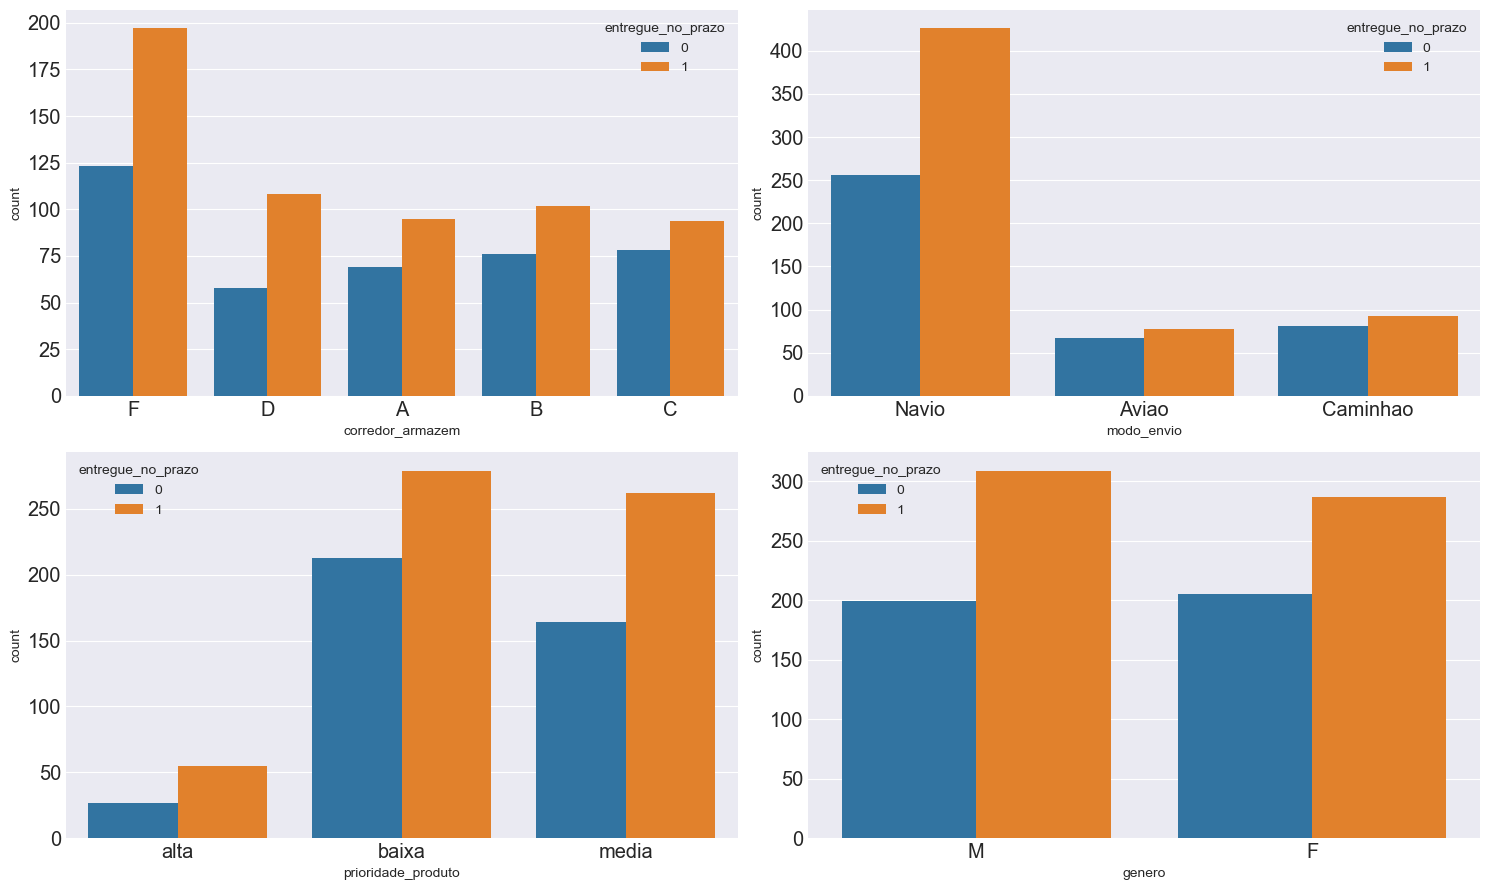

In [39]:
#Plot da contagem das variáveis categóricas
plt.figure(figsize = (15, 9))
features = cats_list
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.countplot(data = df_sample, x = features[i], hue = 'entregue_no_prazo') # hue-> coloca-se a variável alvo.
    plt.tight_layout()
    plt.savefig("Enregue no Prazo por categoria")

<div style="text-align: justify">
<p style="text-align: justify"><strong>1. Corredor do Armazém:</strong><br>
   - O corredor F tem a maior contagem de mercadorias entregues no prazo, indicando talvez uma operação mais eficiente ou produtos mais prioritários localizados lá.<br>
   - Os corredores A e C, em comparação, mostram uma proporção mais equilibrada entre entregas no prazo e atrasadas, sugerindo menos eficiência ou problemas de logística que afetam a pontualidade.</p>

<p style="text-align: justify"><strong>2. Modo de Envio:</strong><br>
   - O envio por 'Navio' mostra um número significativamente maior de entregas no prazo em comparação com 'Avião' e 'Caminhão', o que pode ser devido a melhores planejamentos de tempo no transporte marítimo ou maior tempo de buffer para entregas.<br>
   - O envio por 'Caminhão' tem uma proporção maior de entregas atrasadas em comparação com as no prazo, talvez indicando desafios logísticos ou prazos mais apertados para esse modo de transporte.</p>

<p style="text-align: justify"><strong>3. Prioridade do Produto:</strong><br>
   - Produtos com prioridade 'baixa' têm uma proporção substancialmente maior de entregas atrasadas, o que é esperado, pois eles podem ser postergados em favor de produtos de maior prioridade.<br>
   - Produtos de prioridade 'alta' mostram um número significativo de entregas no prazo, ressaltando o cumprimento do compromisso de entrega prioritária.</p>

<p style="text-align: justify"><strong>4. Gênero:</strong><br>
   - A distribuição de entregas no prazo versus atrasadas é semelhante para ambos os gêneros, indicando que a eficiência do processo de entrega é consistentemente aplicada independentemente do gênero do cliente.<br>
   - A diferença na contagem total entre gêneros não parece afetar a proporção de pontualidade nas entregas.</p>

<p style="text-align: justify">Para todos os gráficos:<br>
- A cor laranja representa as entregas realizadas no prazo (1), e a cor azul representa as entregas que não foram realizadas no prazo (0).<br>
- É importante notar que as contagens por si só não fornecem um percentual direto de pontualidade, mas a comparação visual das alturas das barras pode dar uma noção aproximada das proporções.</p>
</div>



>

### Conclusão das Análises:

- A análise dos dados indica que são confiáveis, sem falhas maiores ou significativas.

- Foi observado que certas variáveis apresentam distribuições levemente assimétricas, o que deve ser considerado ao aplicar modelos estatísticos que pressupõem normalidade.

- A multicolinearidade não se mostrou como um problema neste conjunto de dados, indicando que é possível distinguir os efeitos independentes das variáveis explicativas sobre a variável dependente.

- Alguns atributos demonstram uma falta de correlação com outras variáveis.

- Com relação às características categóricas, `modo_envio`, `corredor_armazem` e `importancia_produto` aparentam ser preditores valiosos para a variável alvo.

### 3 - Perguntas de Negócio

**1- Os atrasos nas entregas estão igualmente distribuídos pelos modos de envio? Há diferenças discrepantes?**

In [40]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [41]:
# análise no nível de linha: O volume de entregas por navio é muito maior, assim , esperasse eu o volume de entregas que chagaram em em atraso 
# també seja maior

df['modo_envio'].value_counts()

Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

In [42]:
# A coluna ID neste caso torna-se inportante pois estamos fazendo a anáilse por coluna. 
# Encontrando os valores únicos para modos de envio com atraso(0) e sem atraso(1).

df_group1 = df.groupby(['entregue_no_prazo', 'modo_envio']).agg({'ID' : 'nunique'}).reset_index()
df_group1



,entregue_no_prazo,modo_envio,ID
0,0,Aviao,708
1,0,Caminhao,725
2,0,Navio,3004
3,1,Aviao,1069
4,1,Caminhao,1035
5,1,Navio,4459


In [43]:
# encotrando os valores totais de "entregue no parazo"(1) e "não entregue no prazo"(0)
df_group2 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index() 
df_group2



,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [44]:
# Vamos juntar as duas tabelas para , em valores absolutos, verificarmos a proporção de "entregue no parazo"(1) e "não entregue no prazo"(0), 
# por maodalidade de entrega,(IDx), em relação ao total de "entregue no parazo"(1) e "não entregue no prazo"(0), (IDy).

df_group3 = df_group1.merge(df_group2, on = 'entregue_no_prazo')
df_group3



,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,4437
1,0,Caminhao,725,4437
2,0,Navio,3004,4437
3,1,Aviao,1069,6563
4,1,Caminhao,1035,6563
5,1,Navio,4459,6563


In [45]:
df_group4 = df.groupby('modo_envio').agg({'ID' : 'nunique'}).reset_index() 
df_group4



,modo_envio,ID
0,Aviao,1777
1,Caminhao,1760
2,Navio,7463


In [46]:
df_group5 = df_group1.merge(df_group4, on = 'modo_envio')
df_group5

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,1777
1,1,Aviao,1069,1777
2,0,Caminhao,725,1760
3,1,Caminhao,1035,1760
4,0,Navio,3004,7463
5,1,Navio,4459,7463


In [47]:
# Criando uma coluna percentual de modo de envio
df_group5['Percentual(%)'] = df_group5['ID_x'] / df_group5['ID_y'] * 100



In [48]:
# Renomeando as colunas 
df_group5.columns = ['Status de Entrega no Prazo', 
                     'Modo de Envio', 
                     'Total Por Categoria', 
                     'Total Geral', 
                     'Percentual(%)']
df_group5

,Status de Entrega no Prazo,Modo de Envio,Total Por Categoria,Total Geral,Percentual(%)
0,0,Aviao,708,1777,39.842431
1,1,Aviao,1069,1777,60.157569
2,0,Caminhao,725,1760,41.193182
3,1,Caminhao,1035,1760,58.806818
4,0,Navio,3004,7463,40.251909
5,1,Navio,4459,7463,59.748091


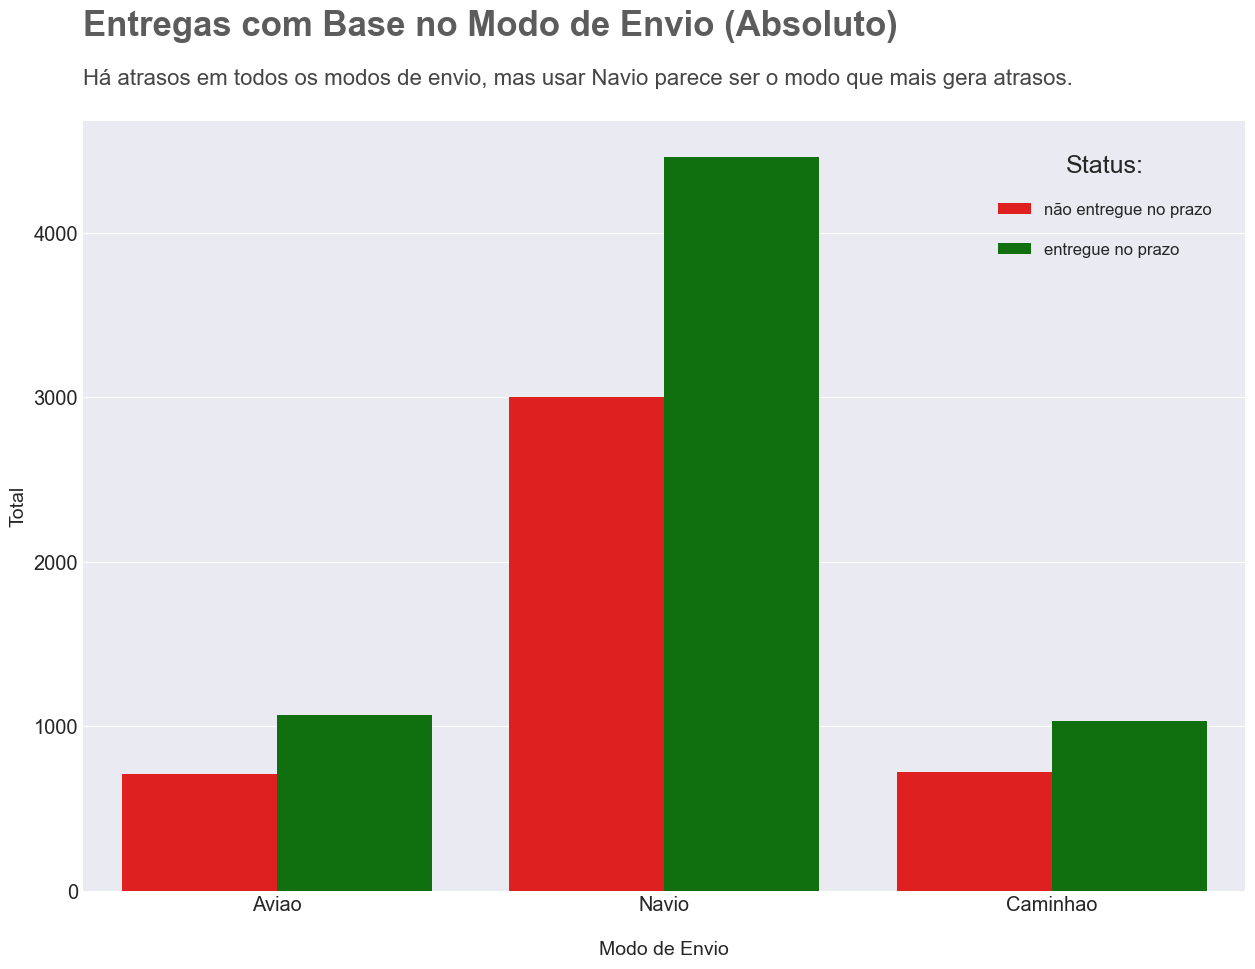

In [49]:
# Gráfico 1 - Análise em Valores Absolutos. "entregue no parazo"(1) e "não entregue no prazo"(0), (IDy).

# Tamanho da figura
plt.figure(figsize=(15,10))

# Chart
chart = sns.countplot(data=df, 
                      x='modo_envio', 
                      hue='entregue_no_prazo',
                      palette=["red","green"])

# Estilo e labels
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize=14)
chart.set_ylabel("Total", fontsize=14)

# Adicionando Título 
chart.text(x=-0.5, 
           y=5200, 
           s="Entregas com Base no Modo de Envio (Absoluto)",
           fontsize=25, 
           weight='bold', 
           alpha=.75)

# Adicionando Sub-Título
chart.text(x=-0.5, 
           y=4900,
           s='Há atrasos em todos os modos de envio, mas usar Navio parece ser o modo que mais gera atrasos.',
           fontsize=16, 
           alpha=.85)

# Legenda
handles, labels = chart.get_legend_handles_labels()
plt.legend(handles=handles, 
           labels=["não entregue no prazo", "entregue no prazo"], 
           loc='upper right', 
           borderpad=1.5, 
           labelspacing=1.5, 
           fontsize=12, 
           title='Status:')
plt.savefig("Produtos entregues por modo de envio")
plt.show()  # Mostra o gráfico


<div style="text-align: justify">
<p style="text-align: justify">O gráfico em anexo compara a quantidade de produtos entregues dentro do prazo (representados pela cor verde) e fora do prazo (representados pela cor vermelha) para cada modo de envio: Avião, Navio e Caminhão.</p>

<p style="text-align: justify">A partir do gráfico, podemos fazer as seguintes observações:</p>

<p style="text-align: justify"><strong>1. Uniformidade Proporcional:</strong><br>
   - A barra correspondente ao Navio mostra a maior contagem total, dividida entre produtos entregues no prazo e não entregues no prazo. No entanto, a proporção de produtos não entregues no prazo (vermelho) é visivelmente maior para o Navio em comparação com os outros modos de envio. Isso indica que, enquanto o Navio é o modo de envio mais utilizado (ou aquele com mais dados registrados), ele também está associado a uma maior quantidade de atrasos.</p>

<p style="text-align: justify"><strong>2. Modo de Envio Avião:</strong><br>
   - A contagem de produtos entregues via Avião é a menor entre os três modos de envio, mas a proporção de produtos entregues no prazo (verde) versus não entregues no prazo (vermelho) é mais favorável do que para o Navio. Isso sugere que o Avião pode ser um modo de envio mais pontual, apesar de ser menos utilizado.</p>

<p style="text-align: justify"><strong>3. Modo de Envio Caminhão:</strong><br>
   - O Caminhão tem uma contagem total de produtos entregues que é menor que a do Navio, mas maior que a do Avião. A proporção entre entregues no prazo e não entregues no prazo para o Caminhão é melhor do que para o Navio, mas não tão boa quanto para o Avião. Isso pode sugerir um equilíbrio entre a utilização do Caminhão como modo de envio e a pontualidade nas entregas.</p>

<p style="text-align: justify"><strong>Análise Geral:</strong><br>
<p style="text-align: justify">- Se a prioridade for a pontualidade, o Avião pode ser considerado o modo de envio mais eficaz.</p>
<p style="text-align: justify">- Se a quantidade de envios for uma consideração importante, o Navio é o mais usado, embora com a maior quantidade de atrasos.</p>
<p style="text-align: justify">- É importante considerar outros fatores que podem influenciar esses resultados, como distâncias, custos de envio, e tipos de produtos. Além disso, a capacidade de cada modo de transporte e as rotas específicas podem desempenhar um papel significativo na interpretação desses dados.</p>

<p style="text-align: justify">A análise desses dados pode ajudar a empresa a tomar decisões informadas sobre estratégias de envio para melhorar a eficiência e a satisfação do cliente, considerando tanto a pontualidade quanto o volume de entregas.</p>
</div>   

In [50]:
df_group5.columns

Index(['Status de Entrega no Prazo', 'Modo de Envio', 'Total Por Categoria',
       'Total Geral', 'Percentual(%)'],
      dtype='object')

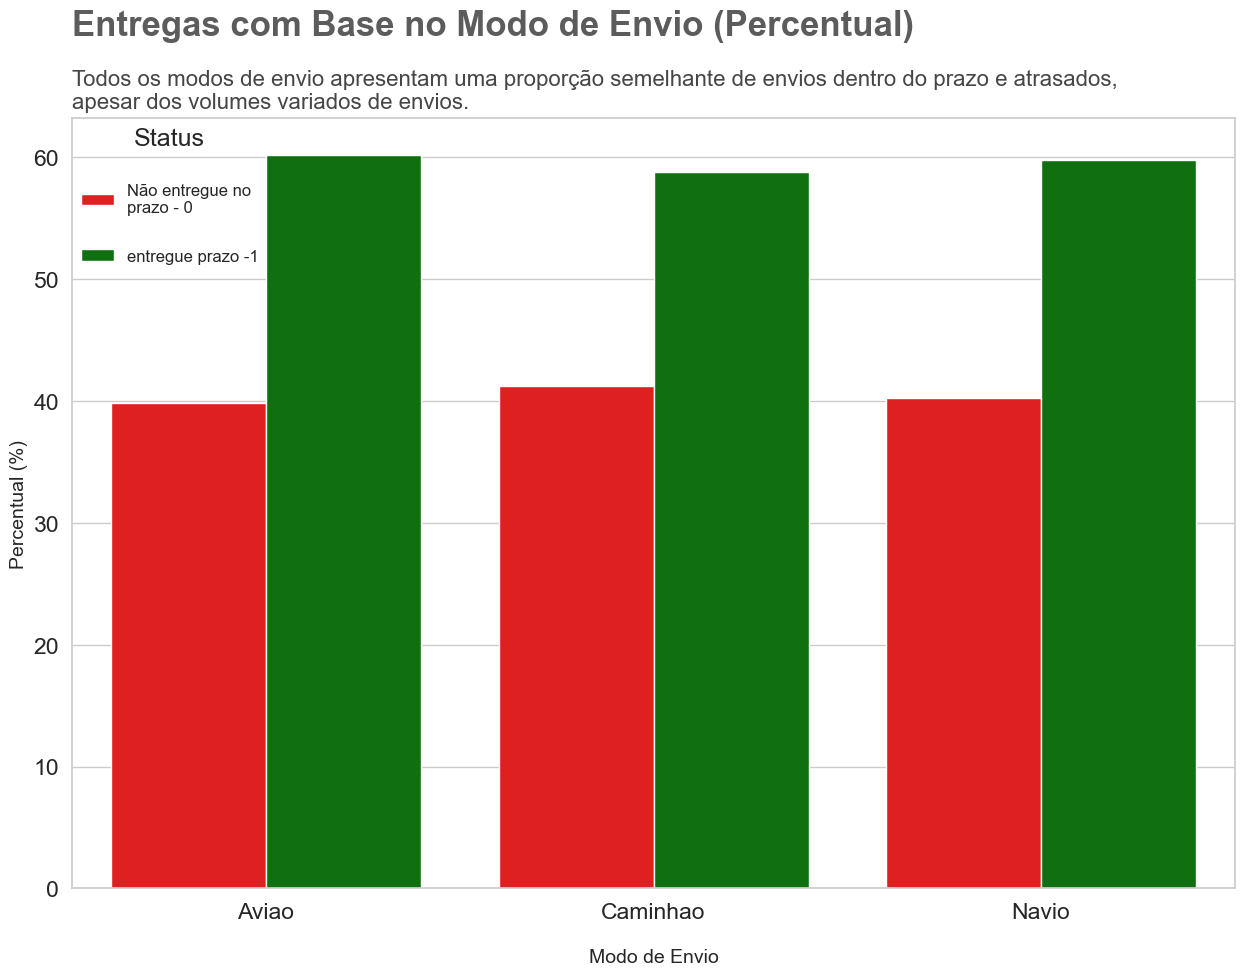

In [51]:
# Gráfico 2 - Análise em Valores Percentuais

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.barplot(x = 'Modo de Envio', 
                    y = 'Percentual(%)', 
                    data = df_group5, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
handles, labels = chart.get_legend_handles_labels()
plt.legend(handles = handles,
          labels = ["Não entregue no \nprazo - 0", 'entregue prazo -1'],
          loc = "upper left",
          borderpad = 0.0,
          labelspacing =2.0,
          fontsize = 12,
          title = "Status")

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "Entregas com Base no Modo de Envio (Percentual)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = 'Todos os modos de envio apresentam uma proporção semelhante de envios dentro do prazo e atrasados, \napesar dos volumes variados de envios.',
           fontsize = 16, 
           alpha = .85) #  <= ATENÇÃO A ESTE PONTO E VIRGULA

plt.savefig("Entrega Percentual com base no modo de envio")
plt.show();

<div style="text-align: justify">
<p style="text-align: justify">O gráfico mostra o percentual de entregas feitas no prazo (verde) e não feitas no prazo (vermelho) para cada modo de envio: Avião, Caminhão e Navio. Diferente do gráfico absoluto anterior, este normaliza os dados por modo de envio, permitindo uma comparação direta das proporções independentemente do volume total de envios por categoria.</p>

<p style="text-align: justify">A partir do gráfico, podemos fazer as seguintes observações:</p>

<p style="text-align: justify"><strong>1. Uniformidade Proporcional:</strong><br>
   - Em termos percentuais, os três modos de envio mostram proporções semelhantes de entregas dentro e fora do prazo. Isso sugere que, independentemente do modo de envio, a taxa de sucesso na entrega dentro do prazo é aproximadamente constante.</p>

<p style="text-align: justify"><strong>2. Diferenças entre Modos de Envio:</strong><br>
   - Embora as proporções sejam semelhantes, ainda podemos ver diferenças sutis. Por exemplo, o modo de envio Navio parece ter uma proporção ligeiramente maior de entregas não realizadas no prazo em comparação com Avião e Caminhão, o que poderia indicar problemas específicos ou desafios associados ao transporte marítimo.</p>

<p style="text-align: justify"><strong>3. Análise Percentual vs. Absoluta:</strong><br>
   - A análise percentual pode revelar informações que os números absolutos escondem. Por exemplo, se o Navio é o modo de envio mais usado, uma pequena diferença percentual em atrasos pode representar um grande número de casos absolutos de atraso. Comparativamente, mesmo uma alta taxa de atraso no modo de envio Avião pode representar menos casos de atraso devido ao menor volume total de envios.</p>

<p style="text-align: justify"><strong>4. Implicações para a Tomada de Decisão:</strong><br>
   - Compreender as taxas percentuais de sucesso na entrega no prazo pode ajudar a informar estratégias de melhoria. Por exemplo, se o transporte por Navio tem uma taxa de atraso ligeiramente maior, esforços podem ser direcionados para otimizar a cadeia de suprimentos nessa área.</p>

<p style="text-align: justify"><strong>5. Considerações Operacionais:</strong><br>
   - Para uma análise operacional detalhada, seria útil combinar essas informações percentuais com dados sobre os custos de envio, a distância, o tempo de trânsito e outros fatores logísticos.</p>

<p style="text-align: justify">O gráfico percentual fornece uma visão comparativa mais justa das taxas de entrega no prazo em relação a cada modo de envio e pode ajudar a identificar áreas que requerem atenção específica para melhorias.</p>
</div>

**2- Há diferença significativa no atraso das entregas quando o produto tem prioridade baixa ou média?**

In [52]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [53]:
# Produtos dentro e fora do prazo por prioridade
df_group11 = df.groupby(['entregue_no_prazo', 'prioridade_produto']).agg({'ID':'nunique'}).reset_index()
df_group11


,entregue_no_prazo,prioridade_produto,ID
0,0,alta,332
1,0,baixa,2158
2,0,media,1947
3,1,alta,616
4,1,baixa,3140
5,1,media,2807


In [54]:
# Total de produtos entregues fora e dentro do prazo.
df_group12 = df.groupby('entregue_no_prazo').agg({'ID': 'nunique'}).reset_index()

df_group12

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [55]:
# Merge para extrair a porcentagem de produtos por prioridade dentro e fora do prazo 
df_group13 = df_group11.merge(df_group12, on = 'entregue_no_prazo')

df_group13

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,4437
1,0,baixa,2158,4437
2,0,media,1947,4437
3,1,alta,616,6563
4,1,baixa,3140,6563
5,1,media,2807,6563


In [56]:
# Total de produtos por prioridade
df_group14 = df.groupby('prioridade_produto').agg({'ID':'nunique'}).reset_index()
 
df_group14

,prioridade_produto,ID
0,alta,948
1,baixa,5298
2,media,4754


In [57]:
# Merge para extrair a a porcentagem de produtos por prioridade
df_group15= df_group11.merge(df_group14, on = "prioridade_produto")


df_group15

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,948
1,1,alta,616,948
2,0,baixa,2158,5298
3,1,baixa,3140,5298
4,0,media,1947,4754
5,1,media,2807,4754


In [58]:
# Criando uma coluna com percentual e renomeando as colunas ( Absolutos)

df_group13['Total por Categoria de Prioridade do Produto / Total por Categoria de Entrega no Prazo(%)'] = df_group13['ID_x'] / df_group13['ID_y'] * 100


df_group13.columns = ['Categoria de Entrega no Prazo', 
                      'Categoria de Prioridade do Produto', 
                      'Total por Categoria de Prioridade do produto', 
                      'Total por Categoria de Entrega no Prazo', 
                      'Total por Categoria de Prioridade do Produto / Total por Categoria de Entrega no Prazo(%)']
df_group13

,Categoria de Entrega no Prazo,Categoria de Prioridade do Produto,Total por Categoria de Prioridade do produto,Total por Categoria de Entrega no Prazo,Total por Categoria de Prioridade do Produto / Total por Categoria de Entrega no Prazo(%)
0,0,alta,332,4437,7.482533
1,0,baixa,2158,4437,48.636466
2,0,media,1947,4437,43.881001
3,1,alta,616,6563,9.385952
4,1,baixa,3140,6563,47.843974
5,1,media,2807,6563,42.770075


In [59]:
# calculando percentual e renomeando as colunas
df_group15['Percentual(%)'] = df_group15['ID_x'] / df_group15['ID_y'] * 100
df_group15.columns = ['Entrega no Prazo(0-Não, 1-Sim)', 
                      'Prioridade do Produto', 
                      'Total Prioridade do produto/Entrega no Prazo', 
                      'Total Entrega no Prazo (0-Não, 1-Sim)', 
                      'Percentual(%)']
df_group15

,"Entrega no Prazo(0-Não, 1-Sim)",Prioridade do Produto,Total Prioridade do produto/Entrega no Prazo,"Total Entrega no Prazo (0-Não, 1-Sim)",Percentual(%)
0,0,alta,332,948,35.021097
1,1,alta,616,948,64.978903
2,0,baixa,2158,5298,40.732352
3,1,baixa,3140,5298,59.267648
4,0,media,1947,4754,40.954985
5,1,media,2807,4754,59.045015


In [60]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

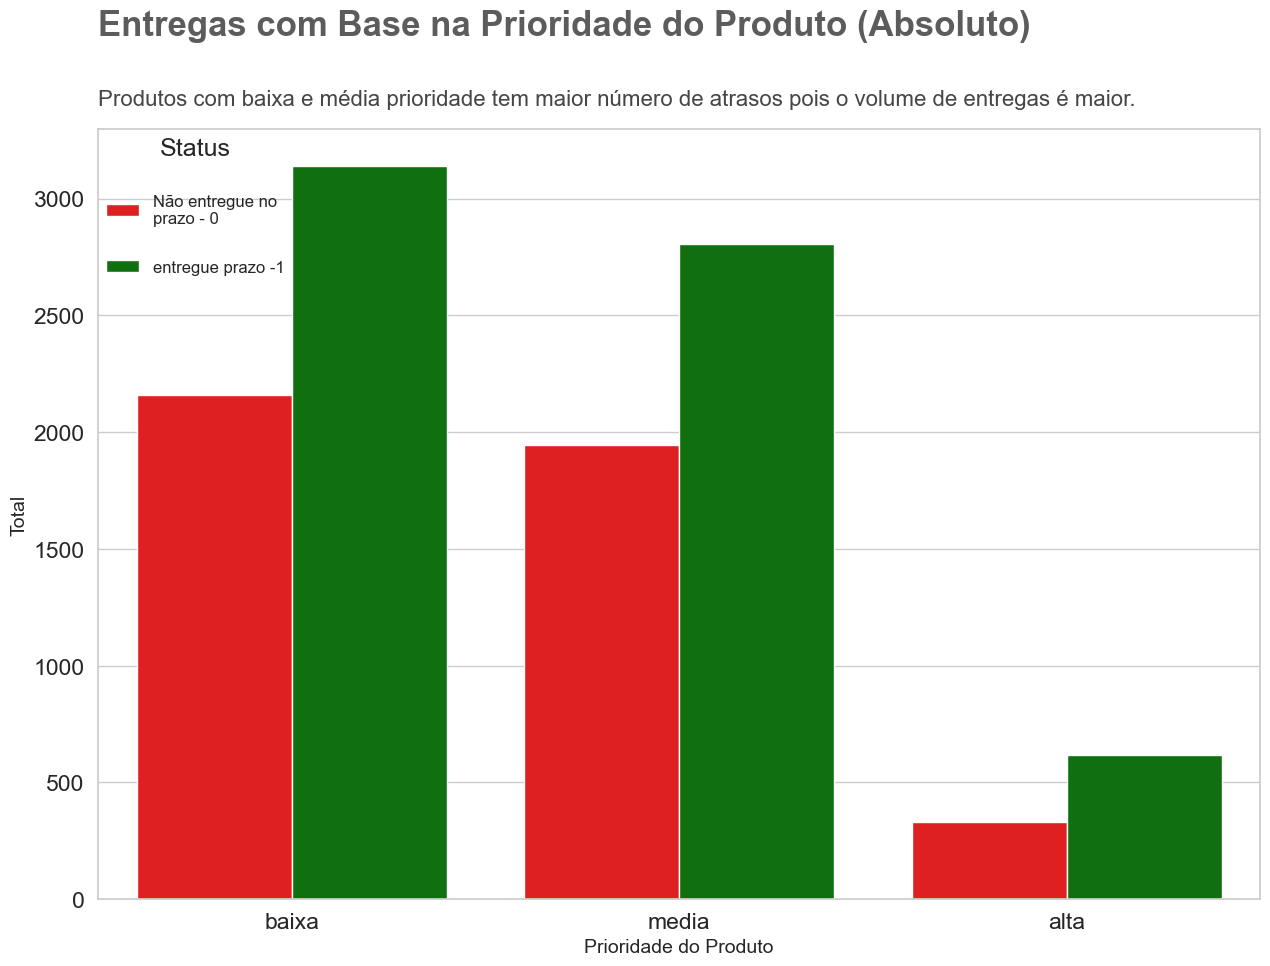

In [61]:
# Gráfico 1 - Análise em Valores Absolutos
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'prioridade_produto', 
                      hue = 'entregue_no_prazo',
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Prioridade do Produto", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)


handles, labels = chart.get_legend_handles_labels()
plt.legend(handles = handles,
          labels = ["Não entregue no \nprazo - 0", 'entregue prazo -1'],
          loc = "upper left",
          borderpad = 0.0,
          labelspacing =2.0,
          fontsize = 12,
          title = "Status")

chart.text(x = -0.5, 
           y = 3700, 
           s = "Entregas com Base na Prioridade do Produto (Absoluto)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 3400,
           s = 'Produtos com baixa e média prioridade tem maior número de atrasos pois o volume de entregas é maior.',
           fontsize = 16, 
           alpha = .85)
plt.savefig("Prioridade_Produto_em_relaçao_entrega_no_prazo")
plt.show();

In [62]:
df_group15.columns

Index(['Entrega no Prazo(0-Não, 1-Sim)', 'Prioridade do Produto',
       'Total Prioridade do produto/Entrega no Prazo',
       'Total Entrega no Prazo (0-Não, 1-Sim)', 'Percentual(%)'],
      dtype='object')

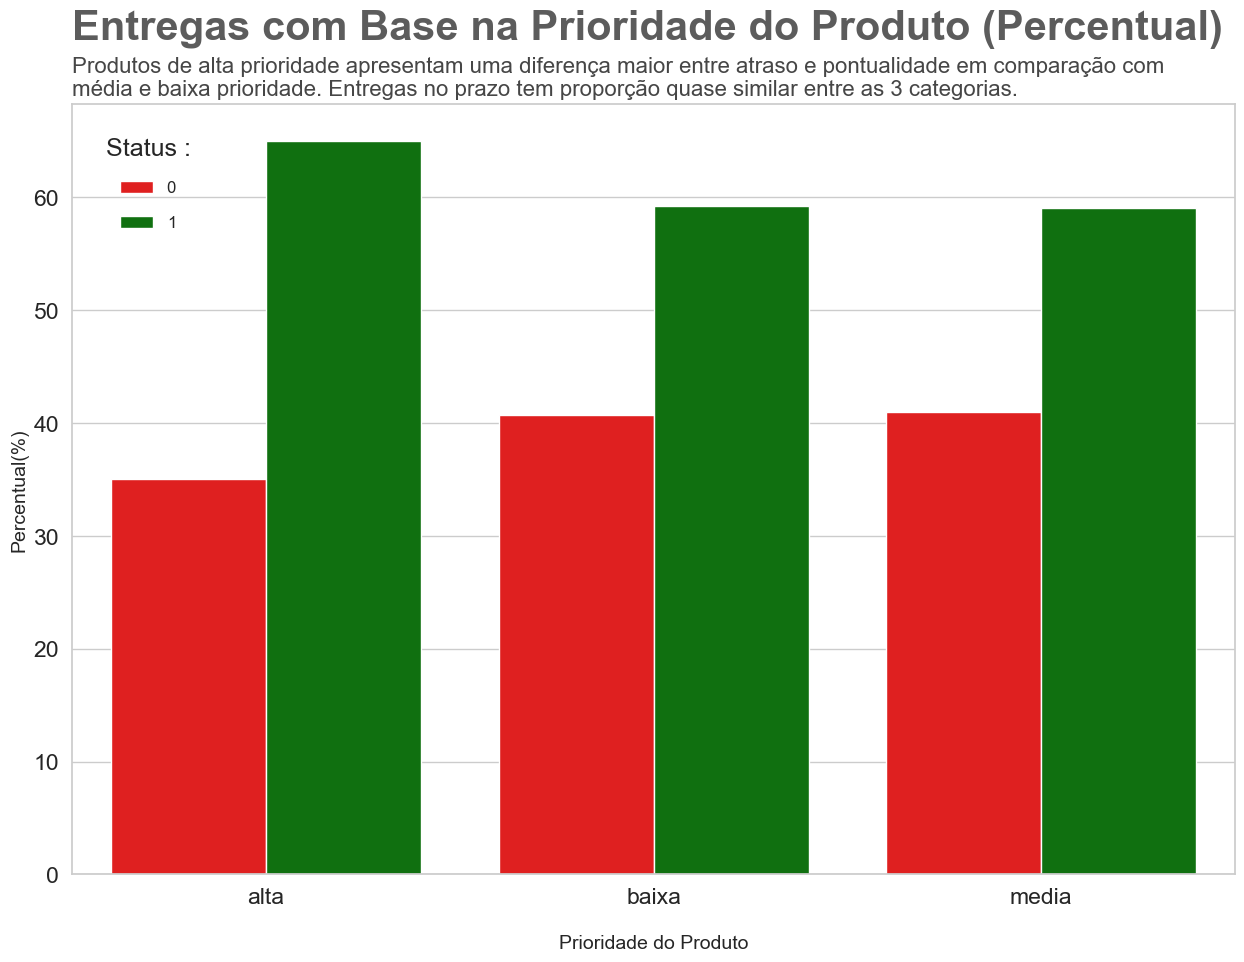

In [63]:
# Gráfico 2 - Análise em Valores Percentuais eme relação aos totais percentuais em relação aos registros proporcionais as prioridades
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Prioridade do Produto', 
                    y = 'Percentual(%)', 
                    data = df_group15, 
                    hue = 'Entrega no Prazo(0-Não, 1-Sim)',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nPrioridade do Produto", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status :')
chart.text(x = -0.5, 
           y = 74, 
           s = "Entregas com Base na Prioridade do Produto (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 69,
           s = 'Produtos de alta prioridade apresentam uma diferença maior entre atraso e pontualidade em comparação com \nmédia e baixa prioridade. Entregas no prazo tem proporção quase similar entre as 3 categorias.',
           fontsize = 16, 
           alpha = .85);

<div style="text-align: justify">
<p style="text-align: justify">No gráfico acima, estamos olhando para as entregas de produtos com base na prioridade do produto — categorizadas como baixa, média e alta — e se foram entregues no prazo ou não.</p>

<p style="text-align: justify">Analisando o gráfico, as seguintes observações podem ser feitas:</p>

<p style="text-align: justify"><strong>1. Prioridade Baixa:</strong><br>
   - A quantidade de produtos entregues no prazo (verde) é maior do que os não entregues no prazo (vermelho). No entanto, a diferença entre entregas no prazo e atrasadas não é tão pronunciada, indicando uma boa eficiência na entrega para produtos de baixa prioridade.</p>

<p style="text-align: justify"><strong>2. Prioridade Média:</strong><br>
   - Observa-se que para produtos de prioridade média, a quantidade de produtos entregues fora do prazo é quase igual à quantidade entregue no prazo. Isso pode sugerir que os processos de entrega para produtos de média prioridade podem precisar de melhorias.</p>

<p style="text-align: justify"><strong>3. Prioridade Alta:</strong><br>
   - A proporção de produtos de alta prioridade entregues no prazo é substancialmente maior do que aqueles entregues fora do prazo. Isso pode indicar uma eficácia maior na gestão de entregas prioritárias ou uma ênfase especial na garantia de que produtos de alta prioridade sejam entregues rapidamente.</p>

<p style="text-align: justify"><strong>4. Volume de Entregas:</strong><br>
   - Os produtos de prioridade baixa e média têm um volume de entregas significativamente maior do que os de alta prioridade. Isso poderia explicar por que há um maior número absoluto de entregas atrasadas nas categorias de baixa e média prioridade: mesmo uma taxa de sucesso relativamente alta pode ainda resultar em um número considerável de atrasos quando o volume total é grande.</p>

<p style="text-align: justify"><strong>5. Interpretação dos Dados:</strong><br>
   - É importante considerar outros fatores que podem influenciar esses resultados, como a definição operacional de "prioridade" e como isso afeta as decisões logísticas. Por exemplo, produtos de alta prioridade podem ter prazos de entrega mais flexíveis, ou pode haver procedimentos especiais para acelerar suas entregas que não são aplicados a produtos de prioridades mais baixas.</p>

<p style="text-align: justify">A partir desses dados, as empresas podem querer investigar por que a proporção de entregas no prazo não é maior para produtos de baixa e média prioridade e se houver procedimentos que possam ser aplicados das entregas de alta prioridade para melhorar o desempenho geral. Além disso, podem ser exploradas estratégias para gerenciar as expectativas de entrega de acordo com a prioridade do produto.</p>
</div>


**3- Quais corredores armazenam produtos com maior proporção de entregas com atraso?**

In [64]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [65]:
df_group21 = df.groupby(['entregue_no_prazo','corredor_armazem']).agg({'ID' : 'nunique'}).reset_index()
df_group21

,entregue_no_prazo,corredor_armazem,ID
0,0,A,758
1,0,B,729
2,0,C,740
3,0,D,738
4,0,F,1472
5,1,A,1075
6,1,B,1104
7,1,C,1094
8,1,D,1096
9,1,F,2194


In [66]:
df_group22 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index() 
df_group22

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [67]:
df_group23 = df_group21.merge(df_group22, on = 'entregue_no_prazo')
df_group23

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,4437
1,0,B,729,4437
2,0,C,740,4437
3,0,D,738,4437
4,0,F,1472,4437
5,1,A,1075,6563
6,1,B,1104,6563
7,1,C,1094,6563
8,1,D,1096,6563
9,1,F,2194,6563


In [68]:
df_group23['Percentual(%)'] = df_group23['ID_x'] / df_group23['ID_y'] * 100
df_group23.columns = ['Status de Entrega no Prazo', 
                      'Corredor do Armazem', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group23

,Status de Entrega no Prazo,Corredor do Armazem,Total Por Categoria,Total Geral,Percentual(%)
0,0,A,758,4437,17.083615
1,0,B,729,4437,16.430020
2,0,C,740,4437,16.677936
3,0,D,738,4437,16.632860
4,0,F,1472,4437,33.175569
5,1,A,1075,6563,16.379704
6,1,B,1104,6563,16.821575
7,1,C,1094,6563,16.669206
8,1,D,1096,6563,16.699680
9,1,F,2194,6563,33.429834


In [69]:
df_group24 = df.groupby('corredor_armazem').agg({'ID' : 'nunique'}).reset_index() 
df_group24

,corredor_armazem,ID
0,A,1833
1,B,1833
2,C,1834
3,D,1834
4,F,3666


In [70]:
df_group25 = df_group21.merge(df_group24, on = 'corredor_armazem')
df_group25

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,1833
1,1,A,1075,1833
2,0,B,729,1833
3,1,B,1104,1833
4,0,C,740,1834
5,1,C,1094,1834
6,0,D,738,1834
7,1,D,1096,1834
8,0,F,1472,3666
9,1,F,2194,3666


In [71]:
df_group25['Percentual(%)'] = df_group25['ID_x'] / df_group25['ID_y'] * 100
df_group25.columns = ['Status de Entrega no Prazo', 
                      'Corredor do Armazem', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group25

,Status de Entrega no Prazo,Corredor do Armazem,Total Por Categoria,Total Geral,Percentual(%)
0,0,A,758,1833,41.352973
1,1,A,1075,1833,58.647027
2,0,B,729,1833,39.770867
3,1,B,1104,1833,60.229133
4,0,C,740,1834,40.348964
5,1,C,1094,1834,59.651036
6,0,D,738,1834,40.239913
7,1,D,1096,1834,59.760087
8,0,F,1472,3666,40.152755
9,1,F,2194,3666,59.847245


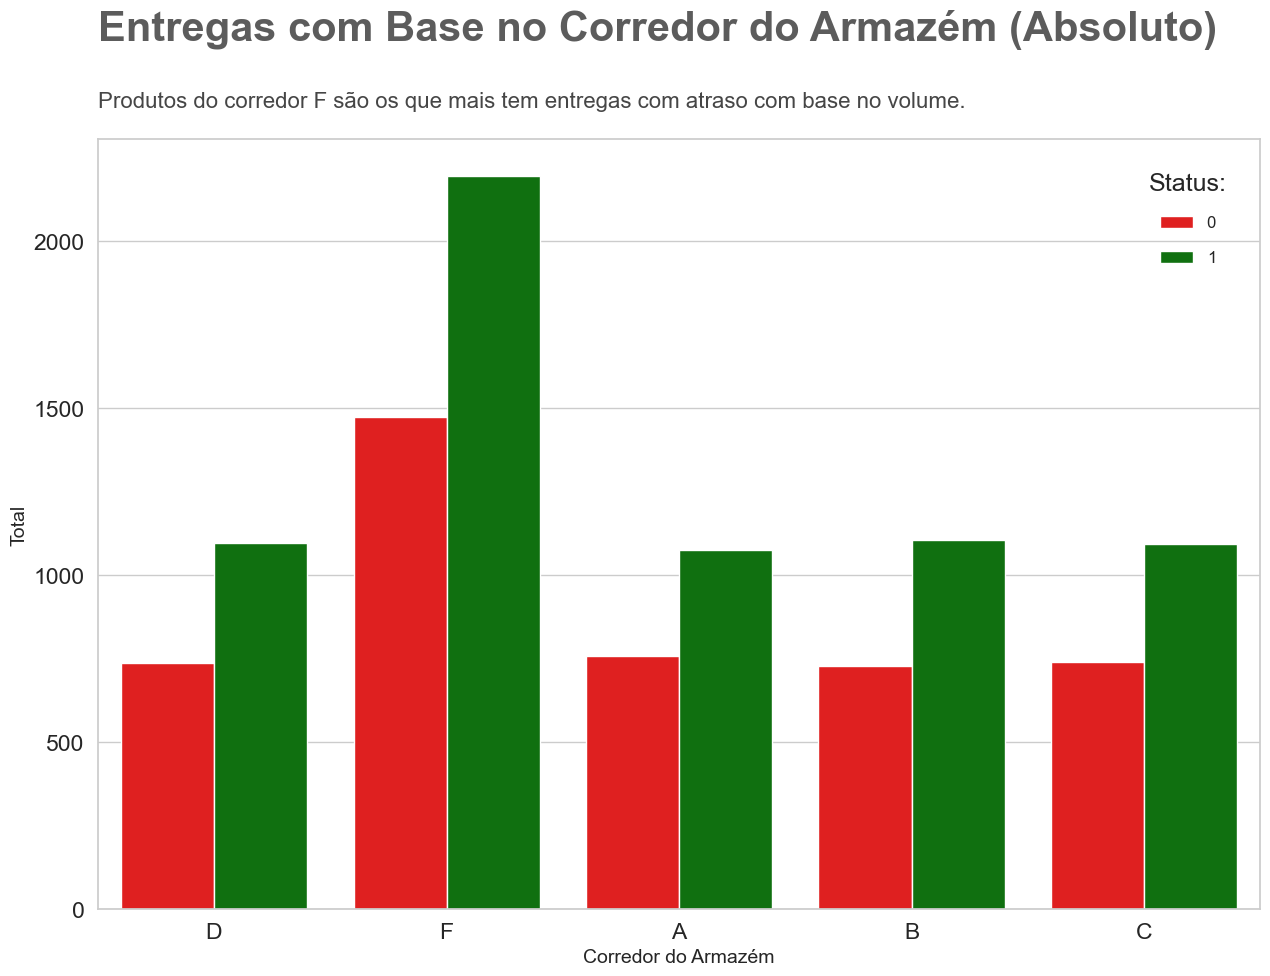

In [72]:
# Gráfico 1 - Análise em Valores Absolutos
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'corredor_armazem', 
                      hue = 'entregue_no_prazo', 
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Corredor do Armazém", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 2600, 
           s = "Entregas com Base no Corredor do Armazém (Absoluto)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 2400,
           s = 'Produtos do corredor F são os que mais tem entregas com atraso com base no volume.',
           fontsize = 16, 
           alpha = .85)
plt.savefig("Corredor em relacao entregue no prazo")
plt.show()

<div style="text-align: justify">
<p style="text-align: justify">No gráfico podemos ver a contagem absoluta de produtos entregues dentro do prazo (verde) e fora do prazo (vermelho) para diferentes corredores do armazém (D, F, A, B, C).</p>

<p style="text-align: justify">A análise do gráfico nos permite fazer as seguintes observações:</p>

<p style="text-align: justify"><strong>1. Corredor F:</strong><br>
   - O corredor F destaca-se com uma alta contagem de produtos entregues fora do prazo, sugerindo que pode haver questões específicas relacionadas a esse corredor que estão afetando a eficiência das entregas.</p>

<p style="text-align: justify"><strong>2. Corredores D, A, B, e C:</strong><br>
   - Enquanto os corredores D, A, B e C também mostram entregas não realizadas no prazo, o volume dessas é menor comparado ao corredor F. Ainda assim, exceto pelo corredor D, a quantidade de produtos entregues no prazo supera os não entregues em cada corredor.</p>

<p style="text-align: justify"><strong>3. Implicações Operacionais:</strong><br>
   - O gráfico sugere que pode haver fatores específicos no corredor F que necessitam de atenção para melhorar a pontualidade das entregas. Isso poderia incluir a organização do estoque, a eficiência dos processos de picking e packing, ou até questões relacionadas à proximidade do corredor com áreas de embarque.</p>

<p style="text-align: justify"><strong>4. Volume de Entregas:</strong><br>
   - É notável que o corredor F também parece ter o maior volume total de produtos armazenados ou o maior número de pedidos processados, o que poderia contribuir para a alta contagem absoluta de atrasos.</p>

<p style="text-align: justify">Para uma ação corretiva, uma análise mais detalhada seria necessária para entender as causas dos atrasos associados ao corredor F. Seria importante investigar se os atrasos são devidos a processos internos do armazém, problemas com fornecedores, ou talvez problemas com demanda e previsão de estoque. Essa análise ajudaria a identificar gargalos operacionais e oportunidades de melhoria na logística do armazém.</p>
</div>


In [73]:
df_group25.columns

Index(['Status de Entrega no Prazo', 'Corredor do Armazem',
       'Total Por Categoria', 'Total Geral', 'Percentual(%)'],
      dtype='object')

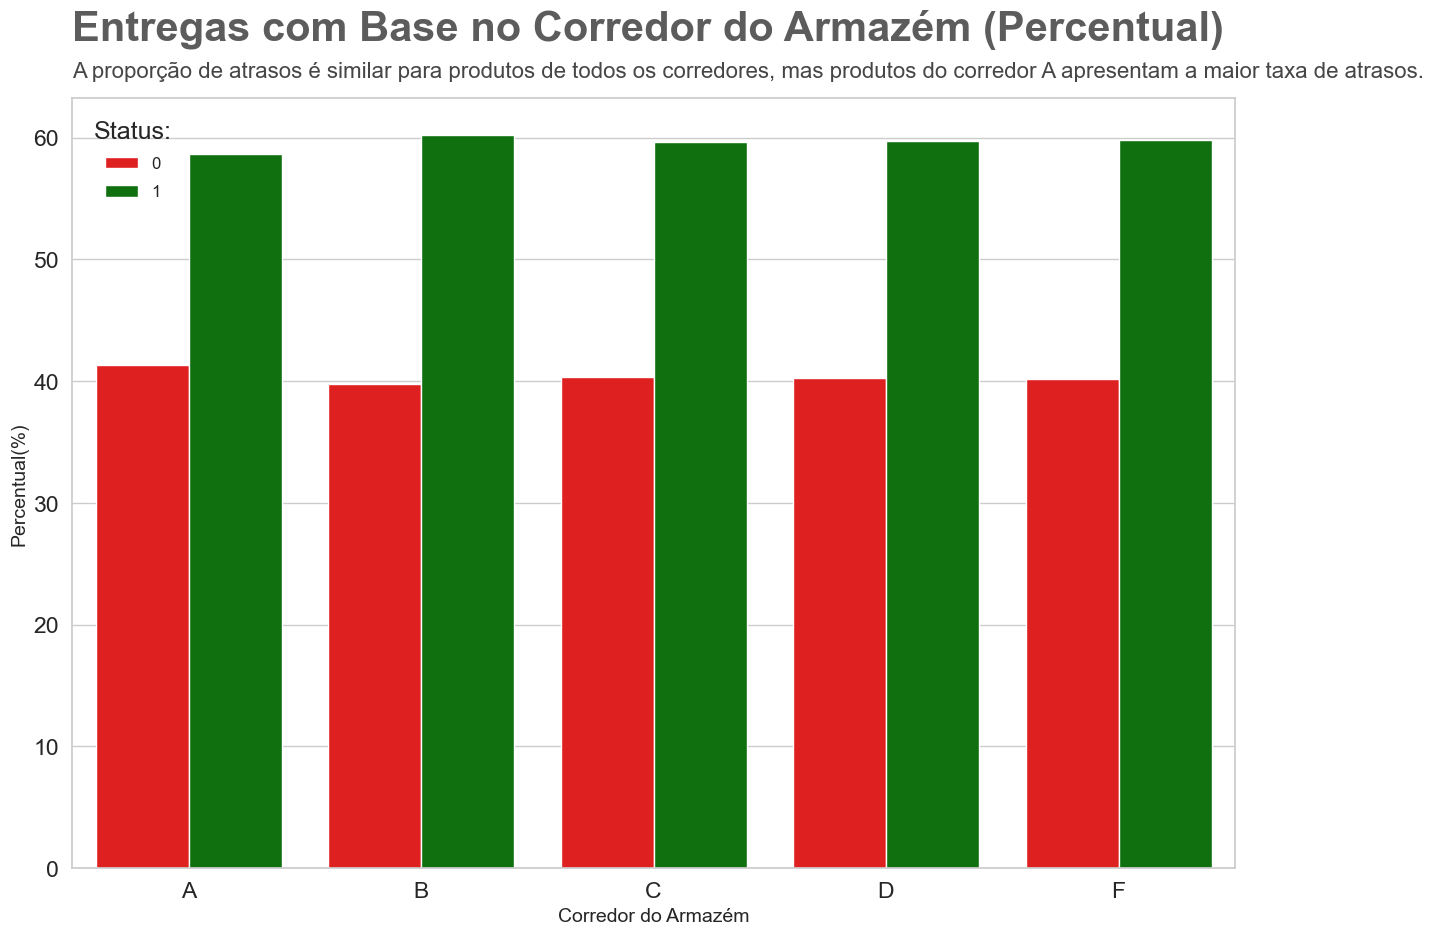

In [74]:
# Gráfico 2 - Análise em Valores Percentuais
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Corredor do Armazem', 
                    y = 'Percentual(%)', 
                    data = df_group25, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Corredor do Armazém", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 0.8, 
           labelspacing = 0.8, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 68, 
           s = "Entregas com Base no Corredor do Armazém (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 65,
           s = 'A proporção de atrasos é similar para produtos de todos os corredores, mas produtos do corredor A apresentam a maior taxa de atrasos.',
           fontsize = 16, 
           alpha = .85)
plt.savefig('Corredor versus entregas')
plt.show()

<div style="text-align: justify">
<p style="text-align: justify">No gráfico, temos a representação percentual de produtos entregues no prazo (verde) e não entregues no prazo (vermelho) para cada corredor do armazém (A, B, C, D, F).</p>

<p style="text-align: justify">A partir deste gráfico, as seguintes análises podem ser feitas:</p>

<p style="text-align: justify"><strong>1. Proporção de Atrasos:</strong><br>
   - A proporção de atrasos é visualmente semelhante entre todos os corredores, sugerindo que não há uma diferença significativa na pontualidade das entregas com base no corredor do armazém.</p>

<p style="text-align: justify"><strong>2. Corredor A:</strong><br>
   - O corredor A se destaca com uma maior percentagem de entregas não realizadas no prazo em comparação com os outros. Isso indica que, apesar das proporções gerais serem semelhantes, pode haver problemas específicos ou desafios operacionais associados ao corredor A que afetam negativamente a pontualidade das entregas.</p>

<p style="text-align: justify"><strong>3. Corredores B, C, D e F:</strong><br>
   - Os corredores B, C, D e F mostram uma distribuição mais balanceada entre entregas no prazo e entregas atrasadas, com entregas no prazo sendo a maioria.</p>

<p style="text-align: justify"><strong>4. Interpretação Percentual:</strong><br>
   - Ao avaliar os dados em termos percentuais, os volumes absolutos das entregas são normalizados, o que permite uma comparação mais justa da eficiência entre os corredores.</p>

<p style="text-align: justify"><strong>5. Considerações Operacionais:</strong><br>
   - Mesmo que as proporções de atrasos sejam semelhantes, o volume absoluto de entregas por corredor pode ser diferente. Assim, em termos operacionais, o mesmo percentual pode representar um número diferente de casos atrasados entre os corredores.</p>

<p style="text-align: justify">Para uma gestão eficaz do armazém, seria útil analisar as razões para os atrasos no corredor A e implementar melhorias para alinhar sua performance com a dos outros corredores. A análise adicional poderia incluir fatores como a distância dos corredores às docas de carregamento, a demanda de produtos armazenados em cada corredor ou a eficácia das operações de picking e embalagem em cada local.</p>
</div>


**4-Como a densidade da variável que representa desconto influencia o status de entrega dos produtos?**


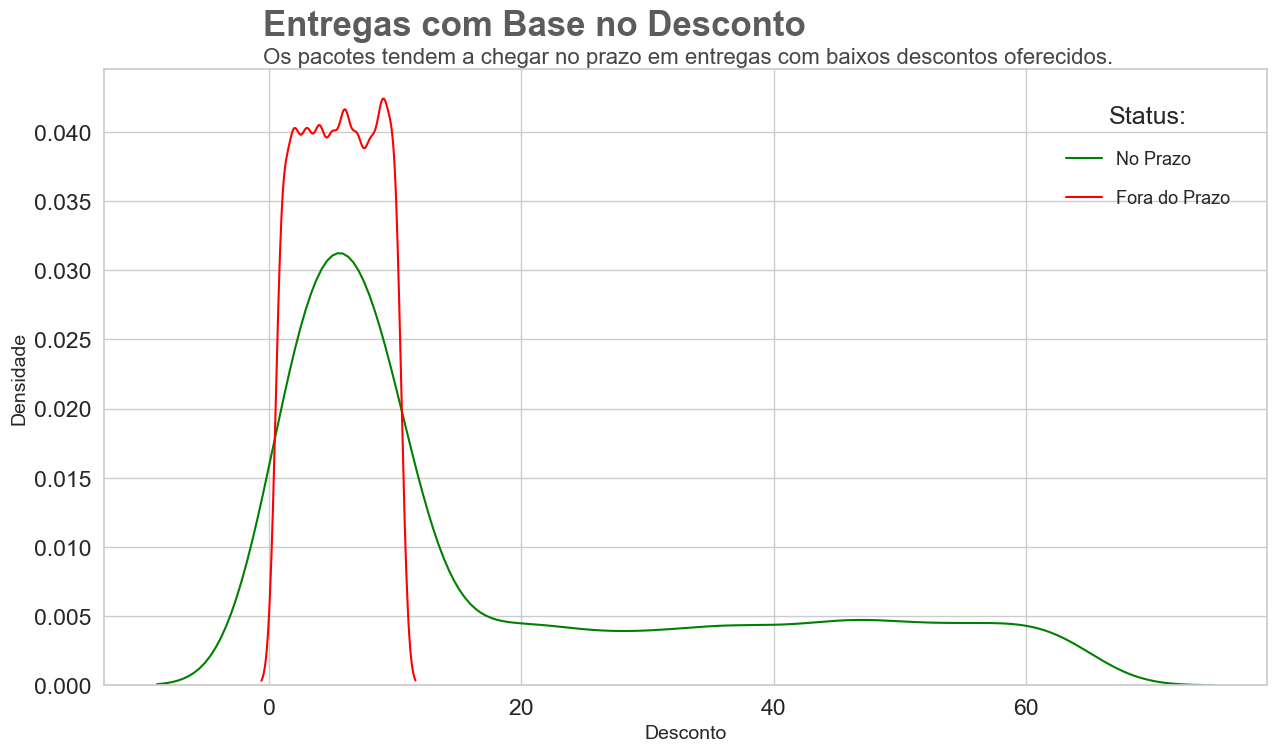

In [75]:
# Resposta com gráfico formatado
plt.figure(figsize = (15,8))
chart = sns.kdeplot(data = df, 
                    x = 'desconto',
                    hue = 'entregue_no_prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('white')
sns.set_palette('prism')
chart.set_xlabel("Desconto", fontsize = 14)
chart.set_ylabel("Densidade", fontsize = 14)

plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 13, 
           title = 'Status:', 
           labels = ['No Prazo', 'Fora do Prazo'])

chart.text(x = -0.5, 
           y = 0.047, 
           s = "Entregas com Base no Desconto",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 0.045,
           s = 'Os pacotes tendem a chegar no prazo em entregas com baixos descontos oferecidos.',
           fontsize = 16, 
           alpha = .85);

plt.savefig("Entregas com Base no Desconto")

<div style="text-align: justify">
<p style="text-align: justify">A partir do gráfico, podemos observar que:</p>

<p style="text-align: justify"><strong>1. Produtos Entregues no Prazo (1) - Linha Verde:</strong><br>
   A distribuição de descontos para produtos entregues no prazo parece ser mais estreita e centrada, com um pico pronunciado. Isso sugere que existe uma faixa de descontos que é mais comum para os produtos entregues no prazo.</p>

<p style="text-align: justify"><strong>2. Produtos Não Entregues no Prazo (0) - Linha Vermelha:</strong><br>
   Em contraste, os produtos que não foram entregues no prazo mostram uma distribuição de descontos mais larga e plana. Há menos concentração em torno de um valor específico de desconto, o que implica uma maior variação nos descontos para estes produtos.</p>

<p style="text-align: justify"><strong>3. Interpretação da Densidade:</strong><br>
   A densidade mais alta na linha verde em torno do pico indica que há uma probabilidade maior de produtos entregues no prazo terem um desconto específico (o valor no eixo x onde o pico ocorre).<br>
   Para produtos não entregues no prazo, a distribuição mais plana sugere que os descontos estão mais dispersos, sem um valor específico de desconto predominante.</p>

<p style="text-align: justify"><strong>4. Amplitude de Descontos:</strong><br>
   A linha vermelha, representando produtos não entregues no prazo, se estende mais amplamente ao longo do eixo dos descontos, o que pode indicar que descontos maiores não garantem necessariamente a pontualidade na entrega.</p>

<p style="text-align: justify"><strong>5. Correlação entre Desconto e Pontualidade:</strong><br>
   A diferença nas formas das duas distribuições pode sugerir que a estratégia de descontos para produtos entregues no prazo é diferente ou mais consistente do que para aqueles que não são entregues no prazo.</p>

<p style="text-align: justify">A análise do gráfico pode levar a investigações mais aprofundadas sobre como os descontos são determinados e sua possível relação com a logística de entrega dos produtos. É importante ressaltar que essa análise é puramente baseada na forma das distribuições e não implica causalidade sem uma investigação mais profunda.</p>
</div>




****FIM***